## Description :

**Data B2**: Industrial Production: Manufacturing 
* **Date du début : Janvier 1992** 
* **Date de la fin : Décembre 2019**
* **Fréquence : Mensuelle**
* **ID: BOST625URN**

In [80]:
### options pour ajuster la taille des figures

In [81]:
options(repr.plot.width = 25, repr.plot.height = 25)

# Importation de données

In [82]:
library("readxl")
workspace = "C:/Users/Wissem/Desktop/series_temporelles/projet"
PATH_TO_DATA = paste(workspace, "B2.xls", sep = "/")
dataB2 = read_excel(path = PATH_TO_DATA)

In [83]:
library(xts)
observation_date = as.Date(dataB2$observation_date, format="%Y-%m-%d")
observation_years = format(as.Date(dataB2$observation_date, format="%Y-%m-%d"),"%Y")
observation_value = dataB2$BOST625URN
dataB2 = xts(observation_value, observation_date, frequency = 12)
names(dataB2) = "observation_value"

In [84]:
dataB2 = ts(dataB2, start = c(1992, 1), end = c(2019, 12), frequency = 12)

In [85]:
dataB2

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1992,8.8,8.7,8.4,7.9,8.2,8.8,8.5,8.3,8.5,7.7,7.6,7.4
1993,8.1,7.8,7.4,6.8,6.8,7.1,6.9,6.5,6.5,6.1,5.7,5.5
1994,6.6,6.3,6.1,5.6,5.5,5.9,6.0,5.8,5.8,5.3,5.0,4.8
1995,5.7,5.3,5.2,5.1,5.0,5.3,5.3,5.0,5.0,4.4,4.1,4.0
1996,4.9,4.6,4.5,4.1,4.2,4.3,4.4,4.0,4.1,3.7,3.6,3.5
1997,4.4,4.1,4.1,3.5,3.6,4.0,3.9,3.7,3.7,3.2,2.9,2.9
1998,3.6,3.4,3.4,2.7,2.9,3.3,3.2,3.0,3.2,2.7,2.6,2.6
1999,3.3,3.3,3.1,2.9,2.9,3.3,3.3,3.0,3.2,2.7,2.6,2.5
2000,3.4,3.2,3.0,2.4,2.5,2.8,2.8,2.5,2.5,2.1,2.1,2.2
2001,3.2,3.1,3.3,3.0,3.2,3.7,3.9,4.0,4.1,4.0,4.2,4.4


In [86]:
### vérifier s'il existe des valeurs nulles

In [87]:
sum(is.na(dataB2))

[1] 0

# Phase 1- Analyse statistique et graphique d’une série temporelle

## Représentation graphique de la série temporelle

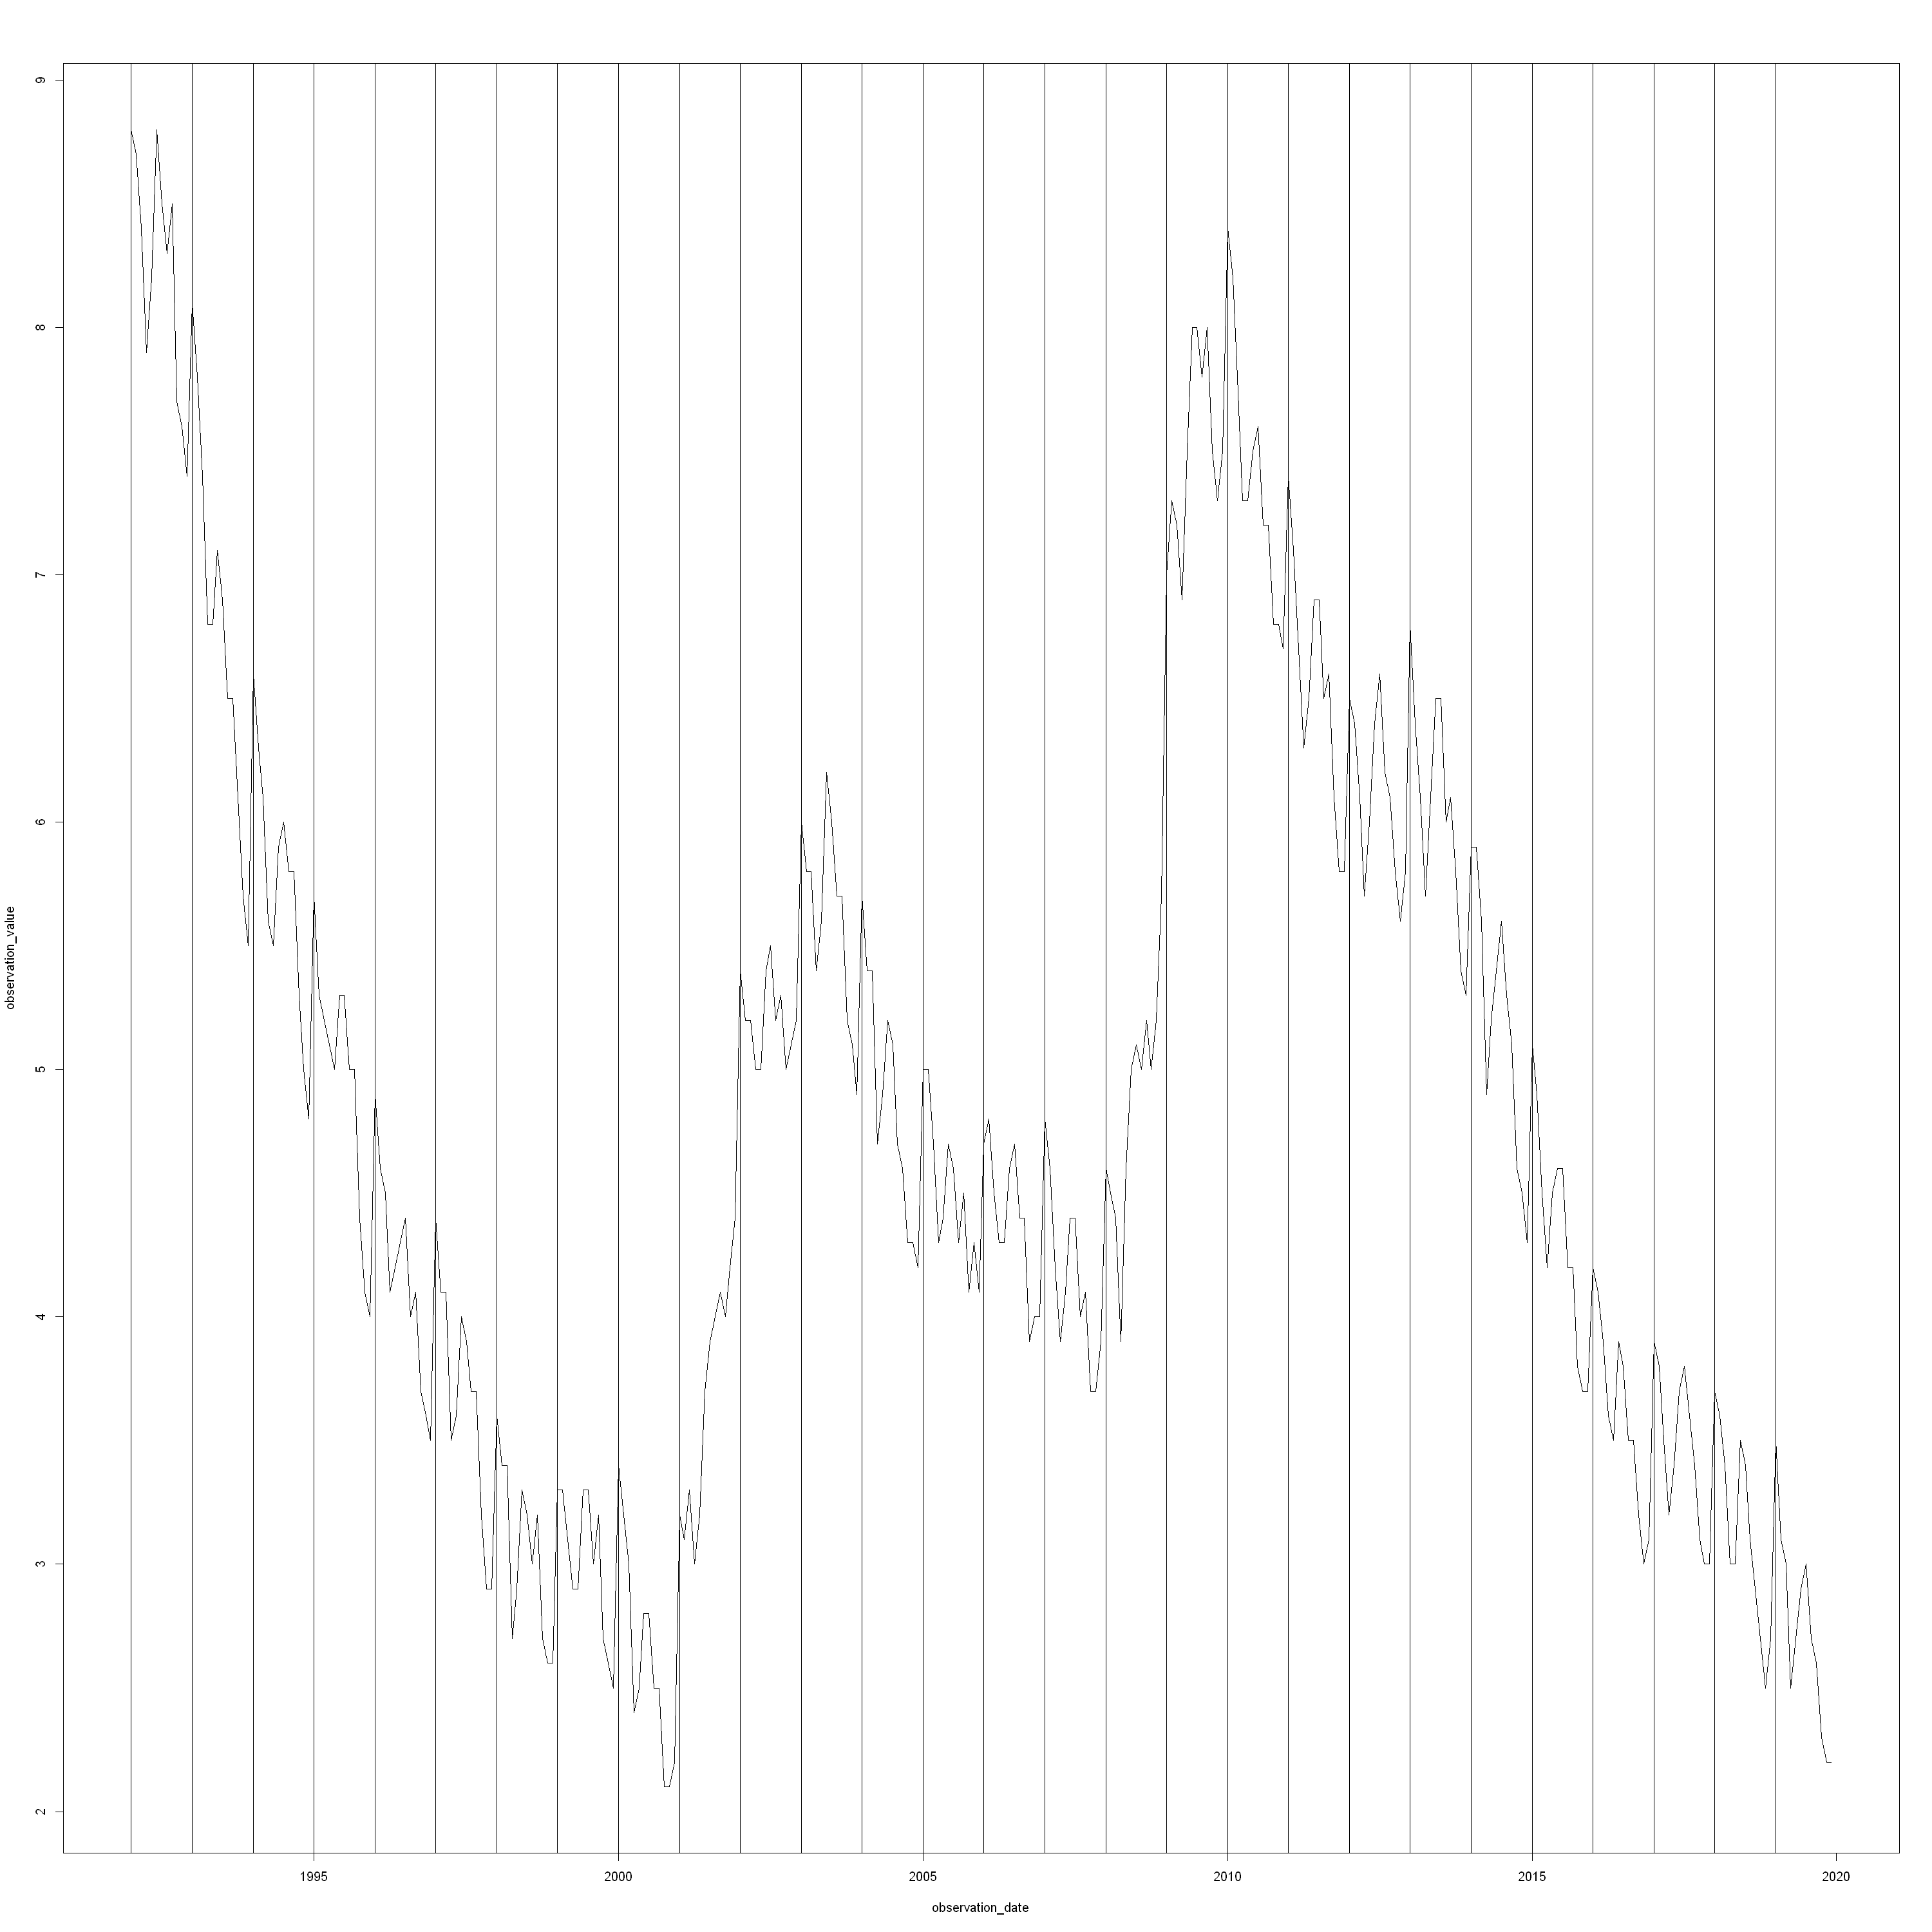

In [88]:
plot(dataB2, ylab="observation_value", xlab="observation_date")
for (year in as.integer(observation_years)) {
    abline(v=year)
} 

### A travers la représentation graphique des données à étudier (dataB2) , on remarque la présence d'une tendance qui varie au cours du temps et d'une saisonnalité.

### Pour confirmer ce qui a été observé dans la représentation graphique de la série, on peut examiner la fonction d'autocorrélation ACF.

## La fonction d'autocorrélation ACF

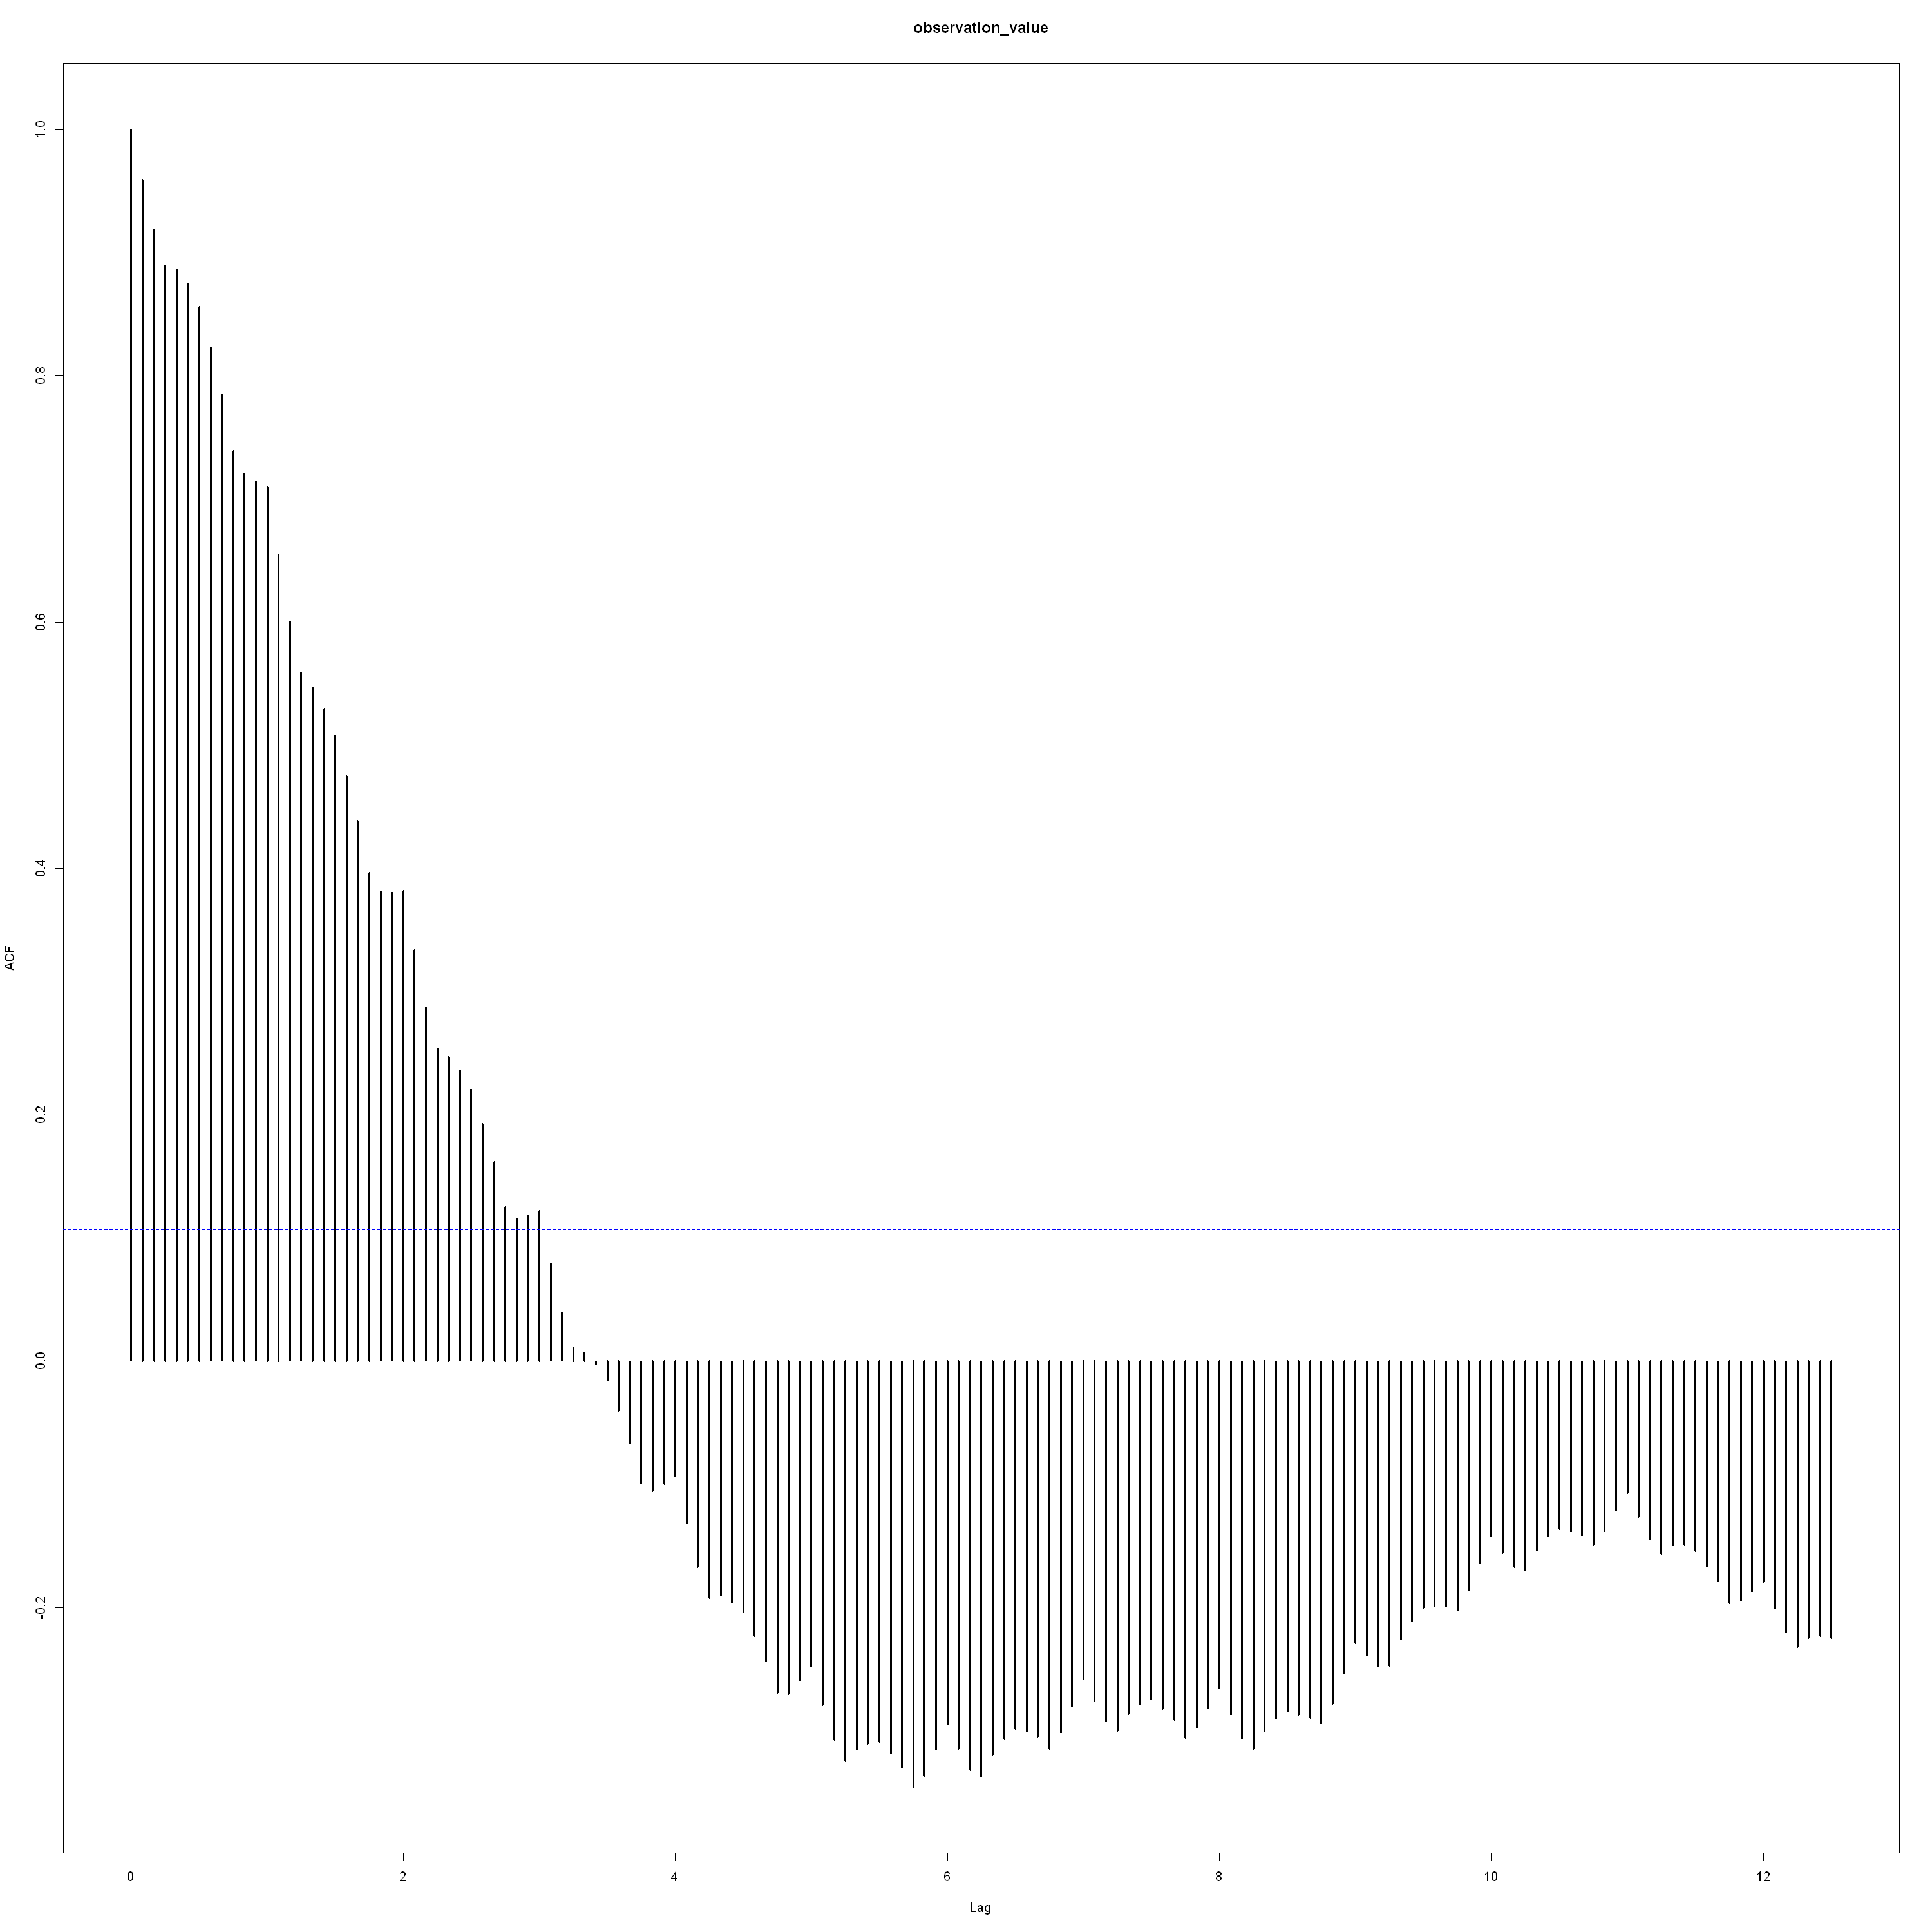

In [89]:
acf(dataB2, lag.max=150, lwd=3, plot=TRUE)

### L’ACF a montré une lente décroissance et puis une lente croissance ce qui confirme notre hypothèse de la présence d’une tendance ainsi qu’un comportement (pattern) répétitif qui nous confirme la présence d’une saisonnalité.

## La décomposition multiplicative de la série

### Le choix de la la décomposition mutiplicative est justifié par le fait que l'amplitude des fluctuations saisonnières varient autour de la tendance centrale  de la série au cours du temps.

### Pour un modèle multiplicatif, nous pouvons appliquer la fonction logarithme sur les données pour réduire leur variabilités et ensuite le transformer en un modèle additif

In [90]:
dataB2 = log(dataB2)

[1] "x"        "seasonal" "trend"    "random"   "figure"   "type"

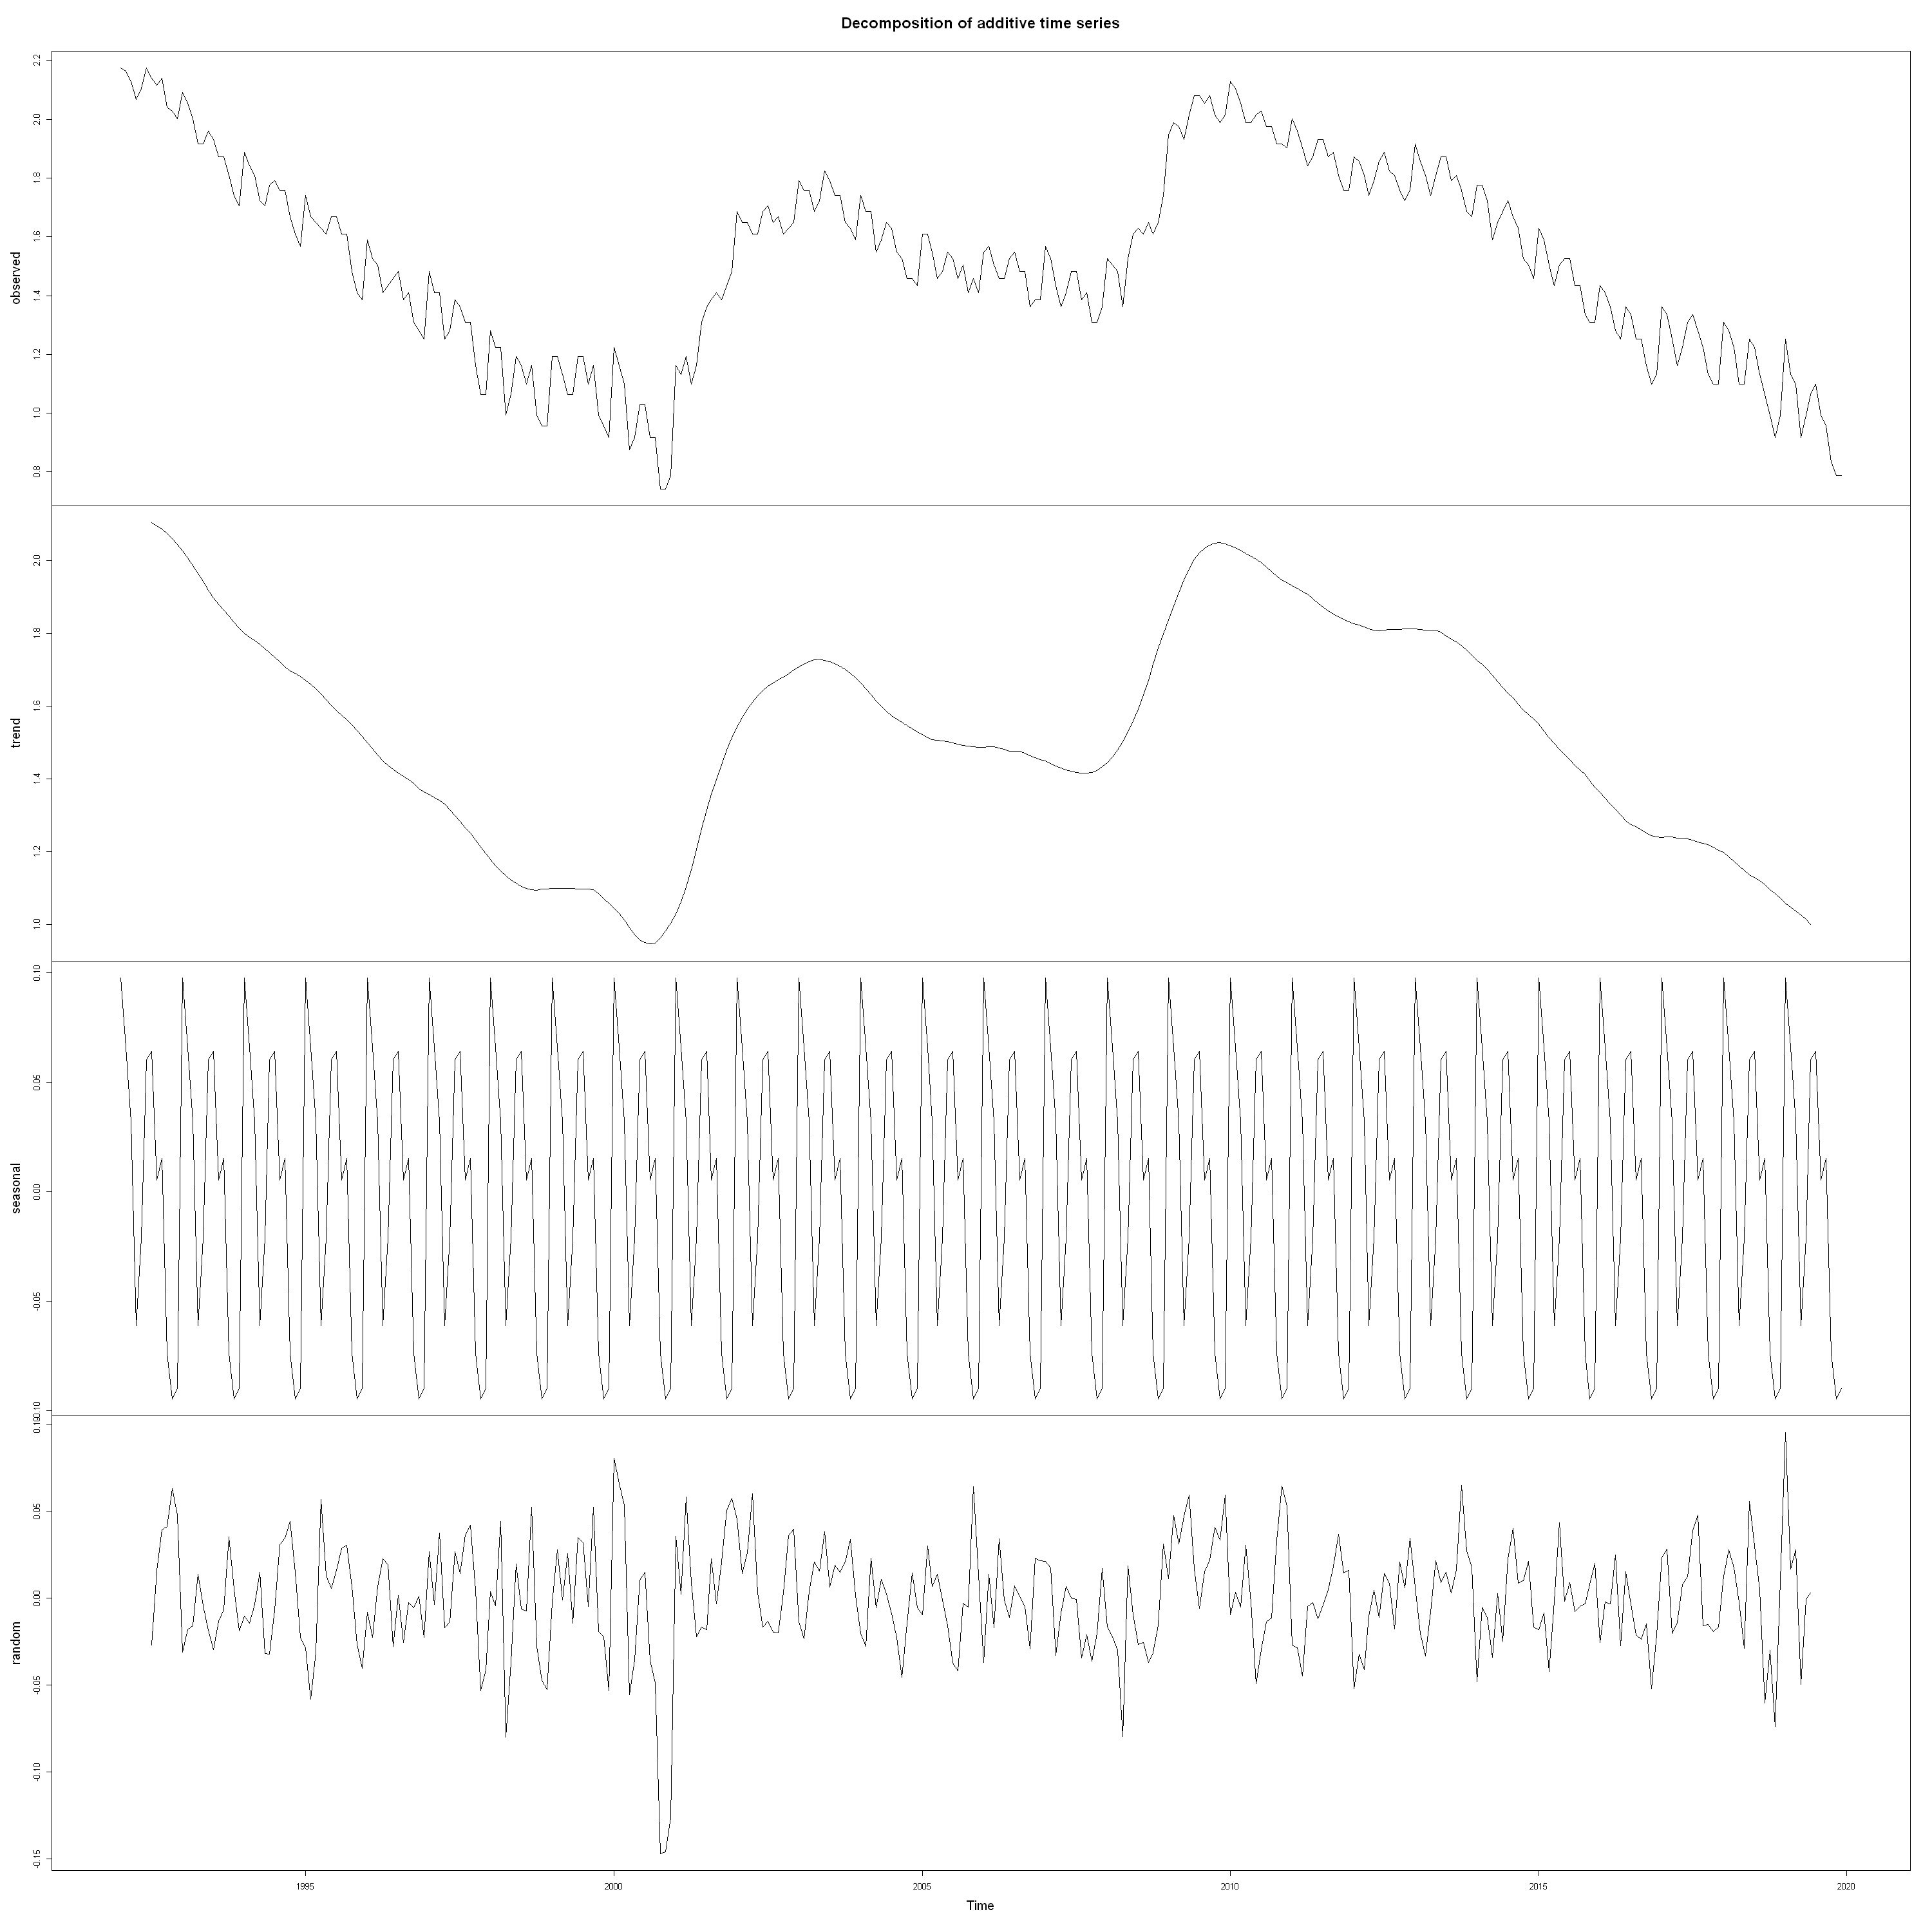

In [91]:
dec.a<-decompose(dataB2,"additive")
names(dec.a)
plot(dec.a)

# Phase 2- Ajustement de la série temporelle

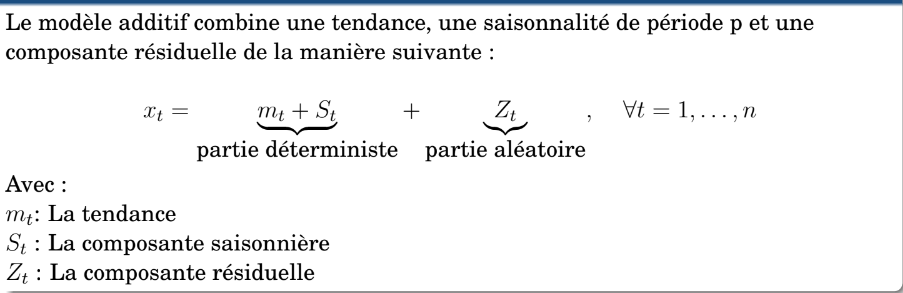

## Ajustement de la tendance

### Le résultat de la décomposition multiplicative (additif aprés avoir appliquer  la fonction logarithme sur les données) de la série par rapport à la tendance nous amène à choisir un ajustement polynômial de la tendance.

### Rq: on peut aller au-delà d'un un ajustement polynômial d'odre 6 ou 7 de la tendance.

## Ajustement de la composante saisonnière

### Une saisonnalité de période paire p=12 pourraît être réduite comme suit:

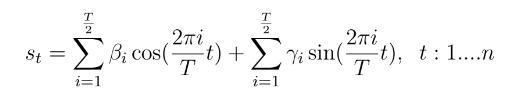

In [92]:
t = 1 : length(dataB2)
MC = matrix(0, length(dataB2), 6)
MS = matrix(0, length(dataB2), 6)
for (i in 1:6) MC[ ,i] = cos(2*pi*t*i/12)
for (i in 1:6) MS[ ,i] = sin(2*pi*t*i/12)

### Tous les paramètres issus de l'ajustement de la tendance et de l'ajustement de la composante saisonnière seront estimés par la méthode des moindres carrés via la fonction lm dans R.

## Le modèle déterministe

### Le modèle déterministe est une combinaison linéaire d'un ajustement polynômial d'odre p de la tendance et de l'ajustement de la composante saisonnière. le modèle pourraît être réduite comme suit:

In [93]:
Model2 = lm(dataB2~t+I(t^2)+I(t^3)+I(t^4)+I(t^5)+I(t^6)+I(t^7)+I(t^8)+I(t^9)+I(t^10)+I(t^11)+I(t^12)+MC+MS)
summary(Model2)


Call:
lm(formula = dataB2 ~ t + I(t^2) + I(t^3) + I(t^4) + I(t^5) + 
    I(t^6) + I(t^7) + I(t^8) + I(t^9) + I(t^10) + I(t^11) + I(t^12) + 
    MC + MS)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38156 -0.05311  0.00292  0.06248  0.24170 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.788e+00  7.847e-02  22.784  < 2e-16 ***
t            1.515e-01  2.185e-02   6.933 2.39e-11 ***
I(t^2)      -1.870e-02  2.022e-03  -9.249  < 2e-16 ***
I(t^3)       9.266e-04  8.884e-05  10.430  < 2e-16 ***
I(t^4)      -2.469e-05  2.203e-06 -11.207  < 2e-16 ***
I(t^5)       3.937e-07  3.386e-08  11.628  < 2e-16 ***
I(t^6)      -3.997e-09  3.401e-10 -11.752  < 2e-16 ***
I(t^7)       2.674e-11  2.295e-12  11.654  < 2e-16 ***
I(t^8)      -1.195e-13  1.048e-14 -11.405  < 2e-16 ***
I(t^9)       3.529e-16  3.191e-17  11.061  < 2e-16 ***
I(t^10)     -6.621e-19  6.210e-20 -10.660  < 2e-16 ***
I(t^11)      7.147e-22  6.984e-23  10.234  < 2e-16 ***
I(t^12)     

In [94]:
AIC(Model2)

[1] -592.6954

## Evaluation du modèle déterministe

### Tous les paramètres, à l'exception des 4 composantes MC4 et MS4, MS5 et  MS6 sont significatifs en fonction de la p-valeur observée.

### La valeur du coefficient R^2 du  modèle 92%

### La valeur du coefficient R^2 ajusté du modèle (91.38%)

### La valeur du coefficient AIC du modèle (-592.695)

## Représentation graphique du modèle déterministe ajusté à la série

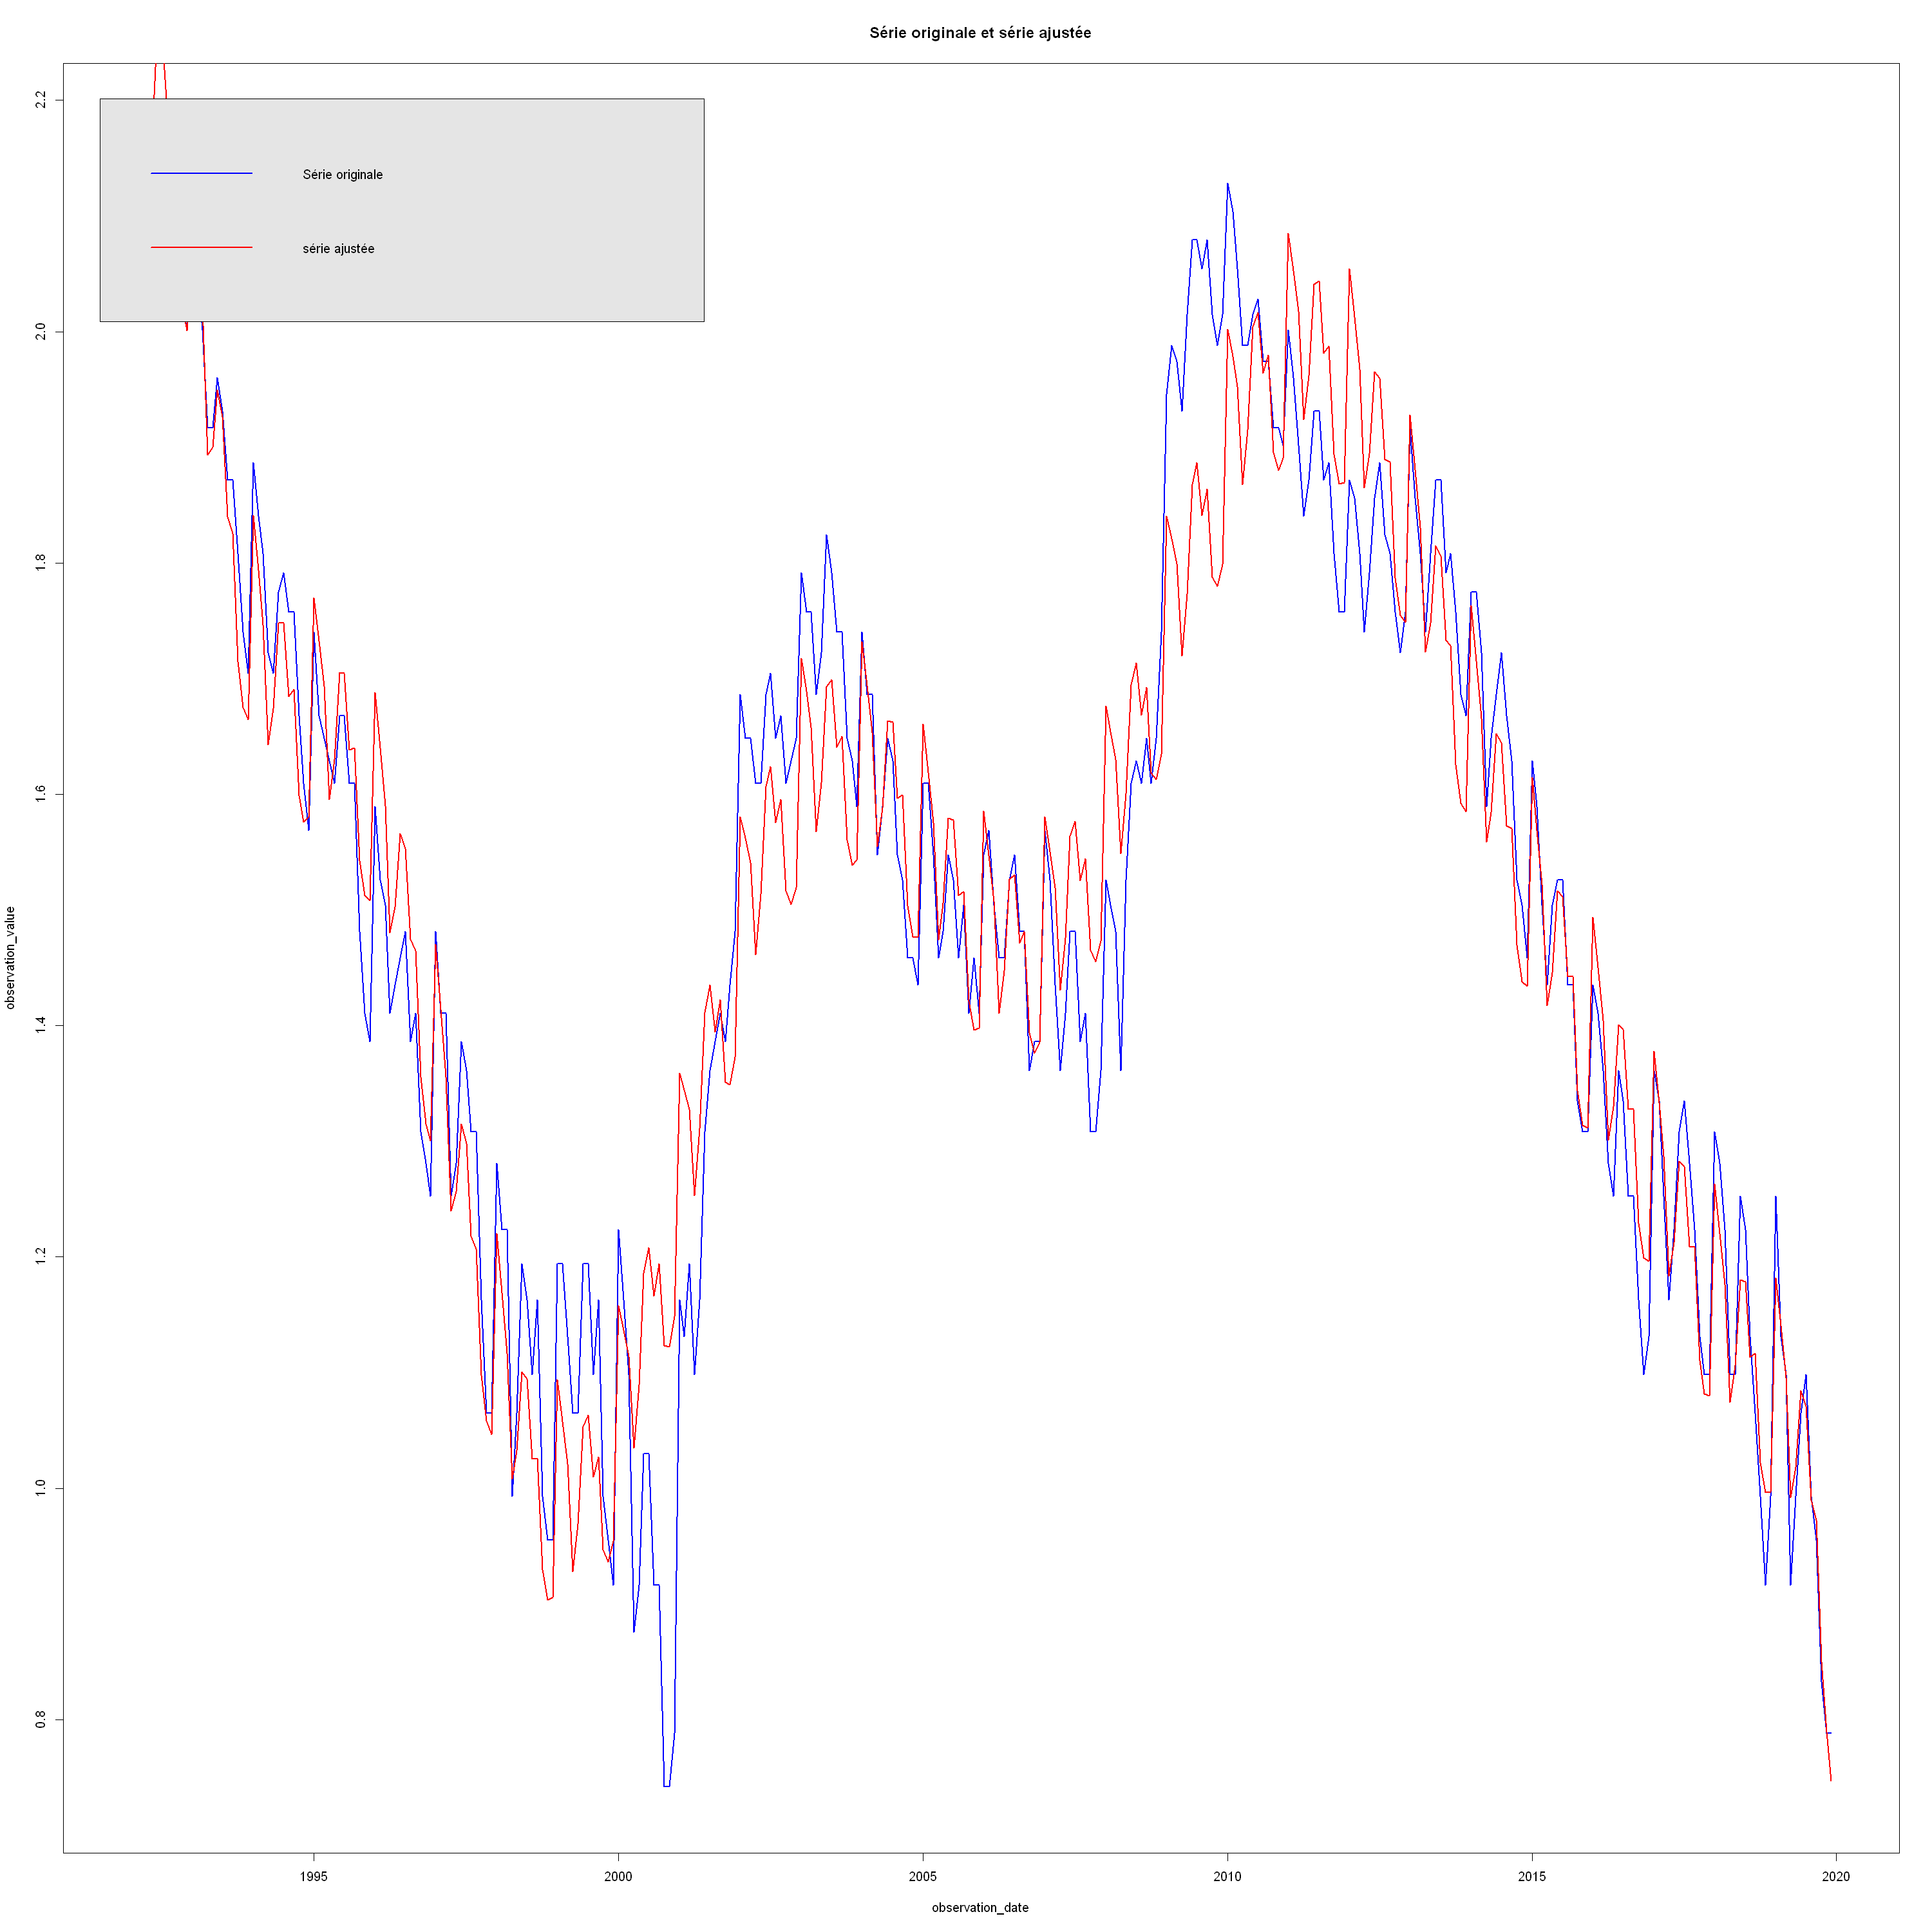

In [95]:
plot(dataB2, xlab="observation_date", ylab="observation_value", main="Série originale et série ajustée", col="blue",lwd=2)
points(time(dataB2), fitted(Model2), lwd=2, type="l", col="red")
legend("topleft", c("Série originale","série ajustée"), inset = .02, bg = "gray90", lwd=c(2,2), col=c("blue","red"))

# Phase 3- Analyse et modélisation des résidus issus de l’ajustement

## Représentation graphique des résidus issus de l’ajustement

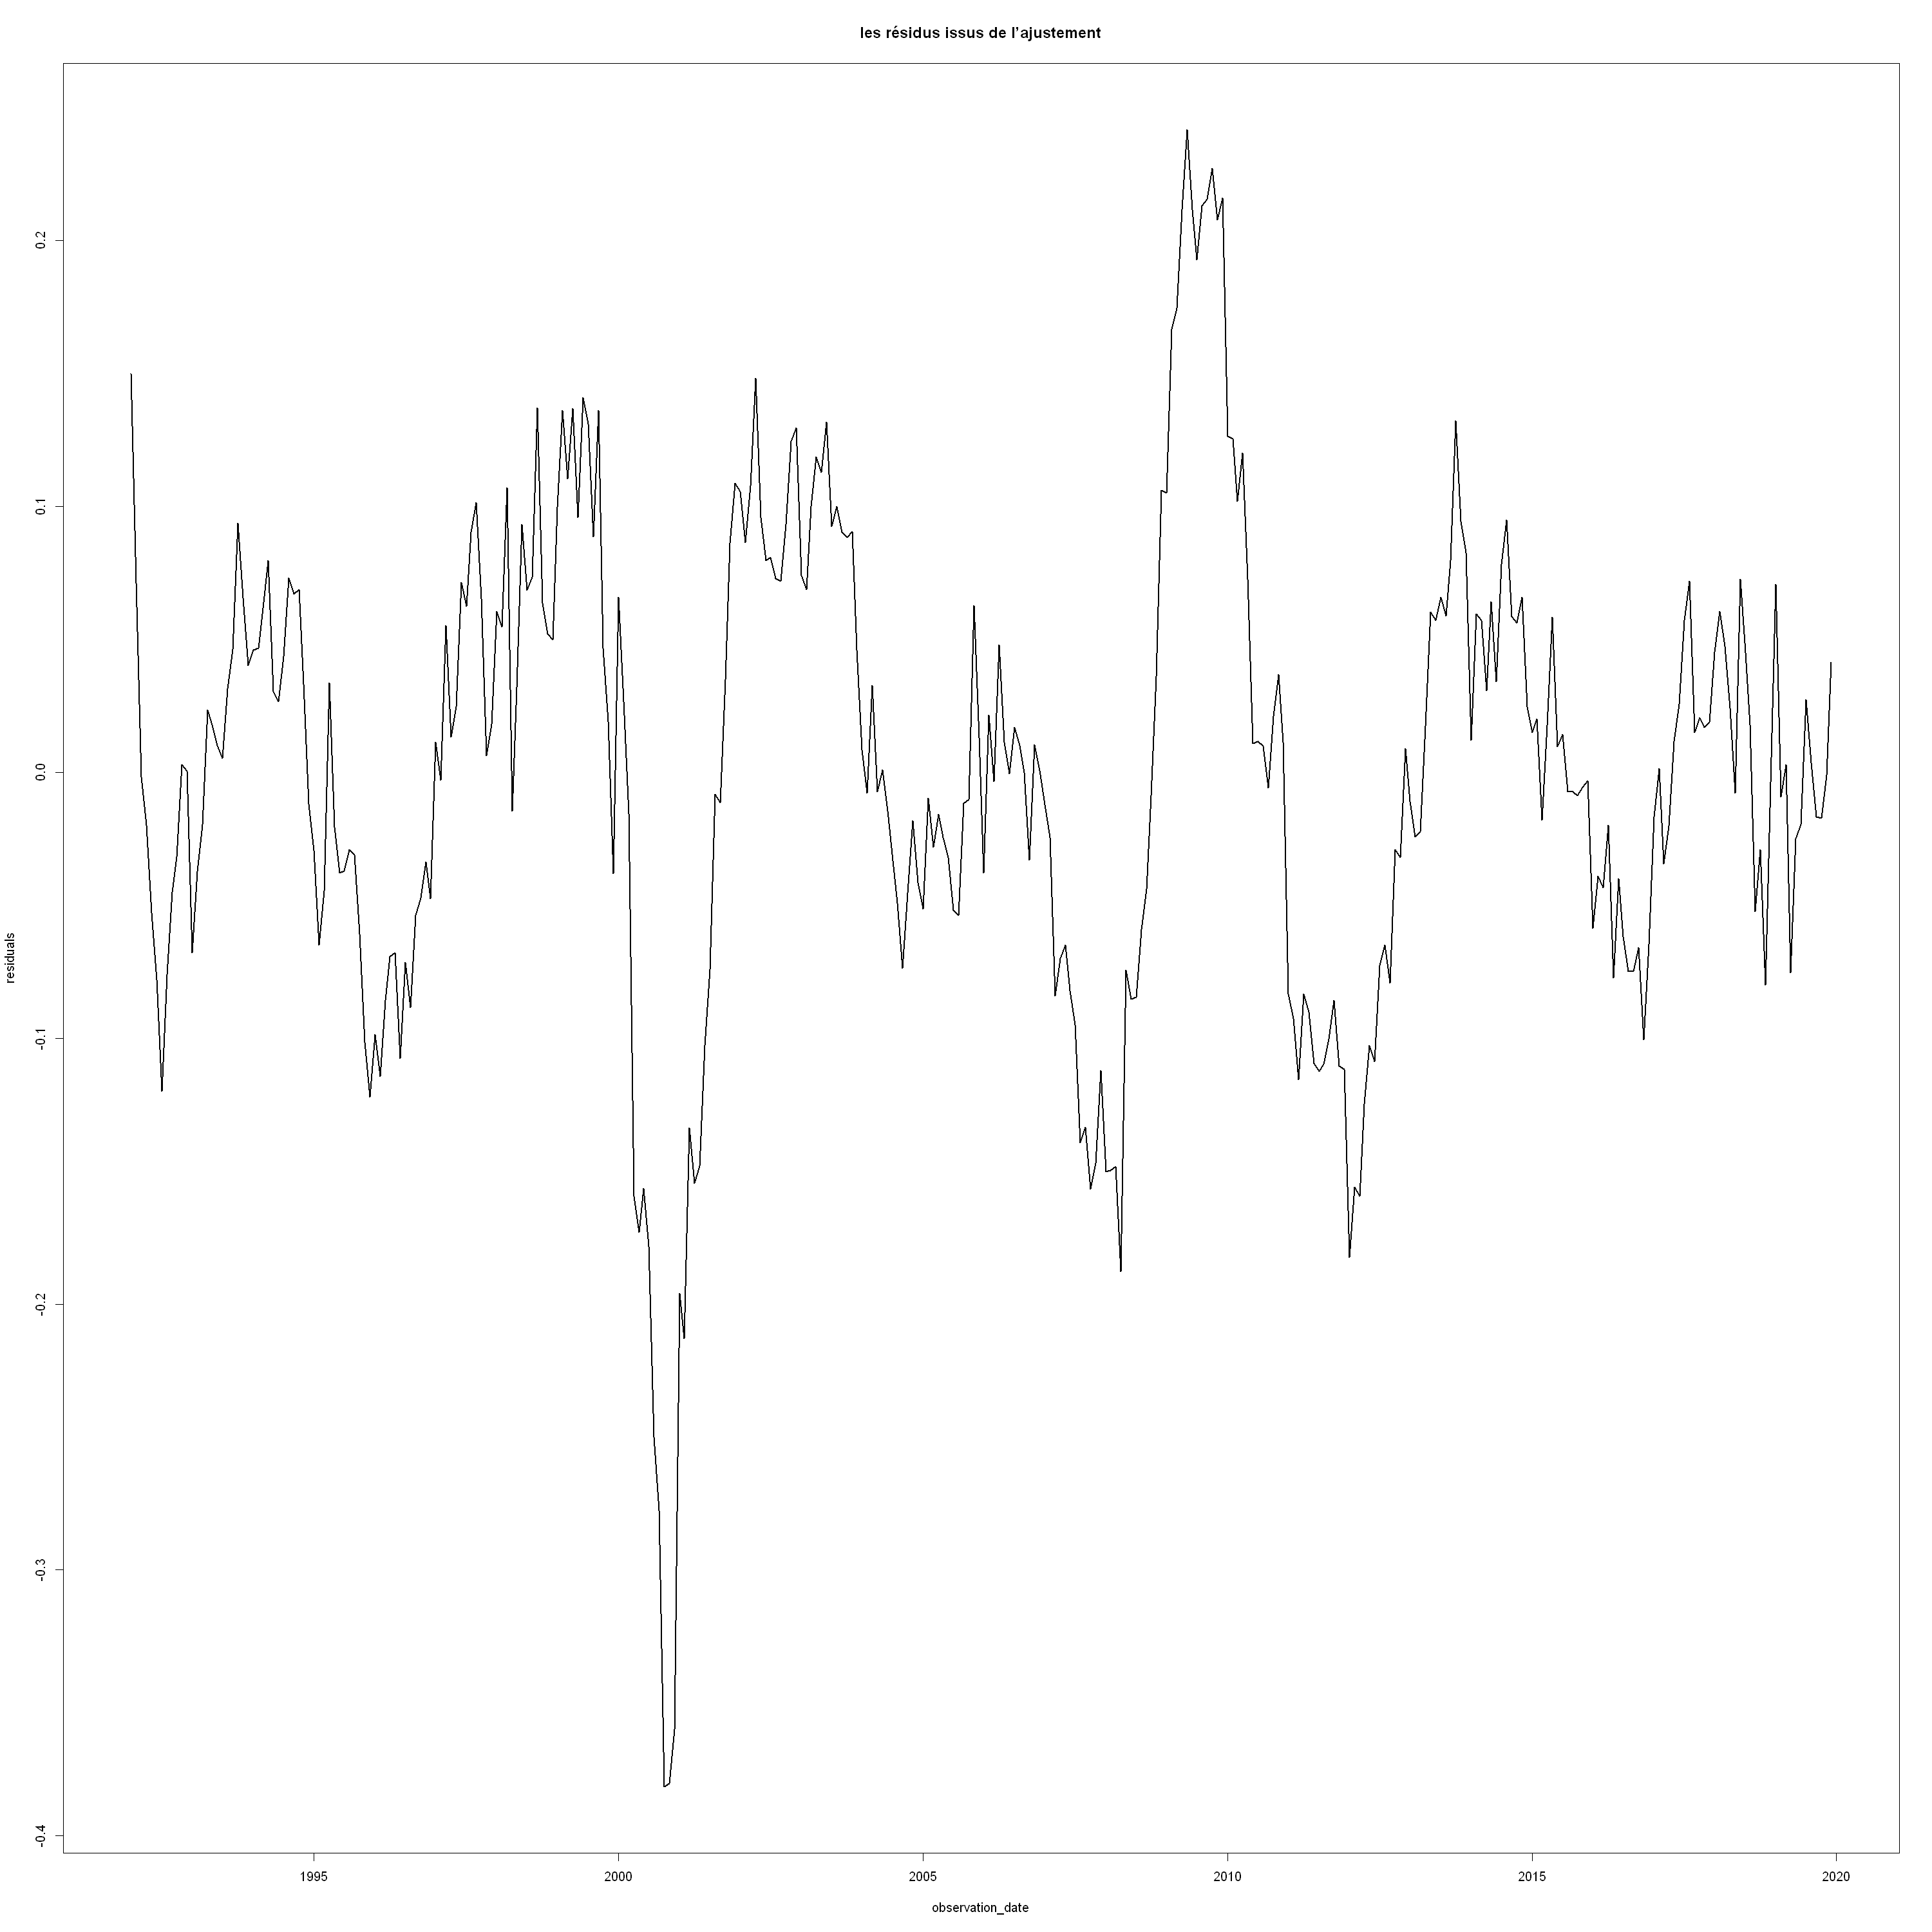

In [96]:
residuals<-Model2$residuals

plot(time(dataB2), residuals, xlab="observation_date", ylab="residuals", main="les résidus issus de l’ajustement",lwd=2,type="l")

## Test si les résidus correspond à un bruit blanc ou non

### Une fois qu' on a ajusté la série, la question qui se pose à ce niveau est: <br> <br> Mon ajustement est-il parfait? est-ce le mieux que je puisse faire ? ou je peux améliorer encore mon ajustement ? <br> <br> Existe-t-il un pattern dans les résidus issus de mon ajustement que je peux capter et améliorer mon modèle ? <br> <br> Quand dois-je arrêter l'ajustement de ma série ?
### Si les résidus  issus de l’ajustement de la série correspondent à un bruit blanc, le modèle est parfait !

### Les hypothèses pour qu' une série correspond à un bruit blanc: <br> <br>La moyenne de la série est nulle<br> <br> La variance de la série est constante par rapport au temps<br> <br>Il n'y a pas de corrélation entre la série elle même et des versions retardées (lagged) de la série. (absence d'autocorrélation)

### La fonction d'autocorrélation ACF pour les résidus

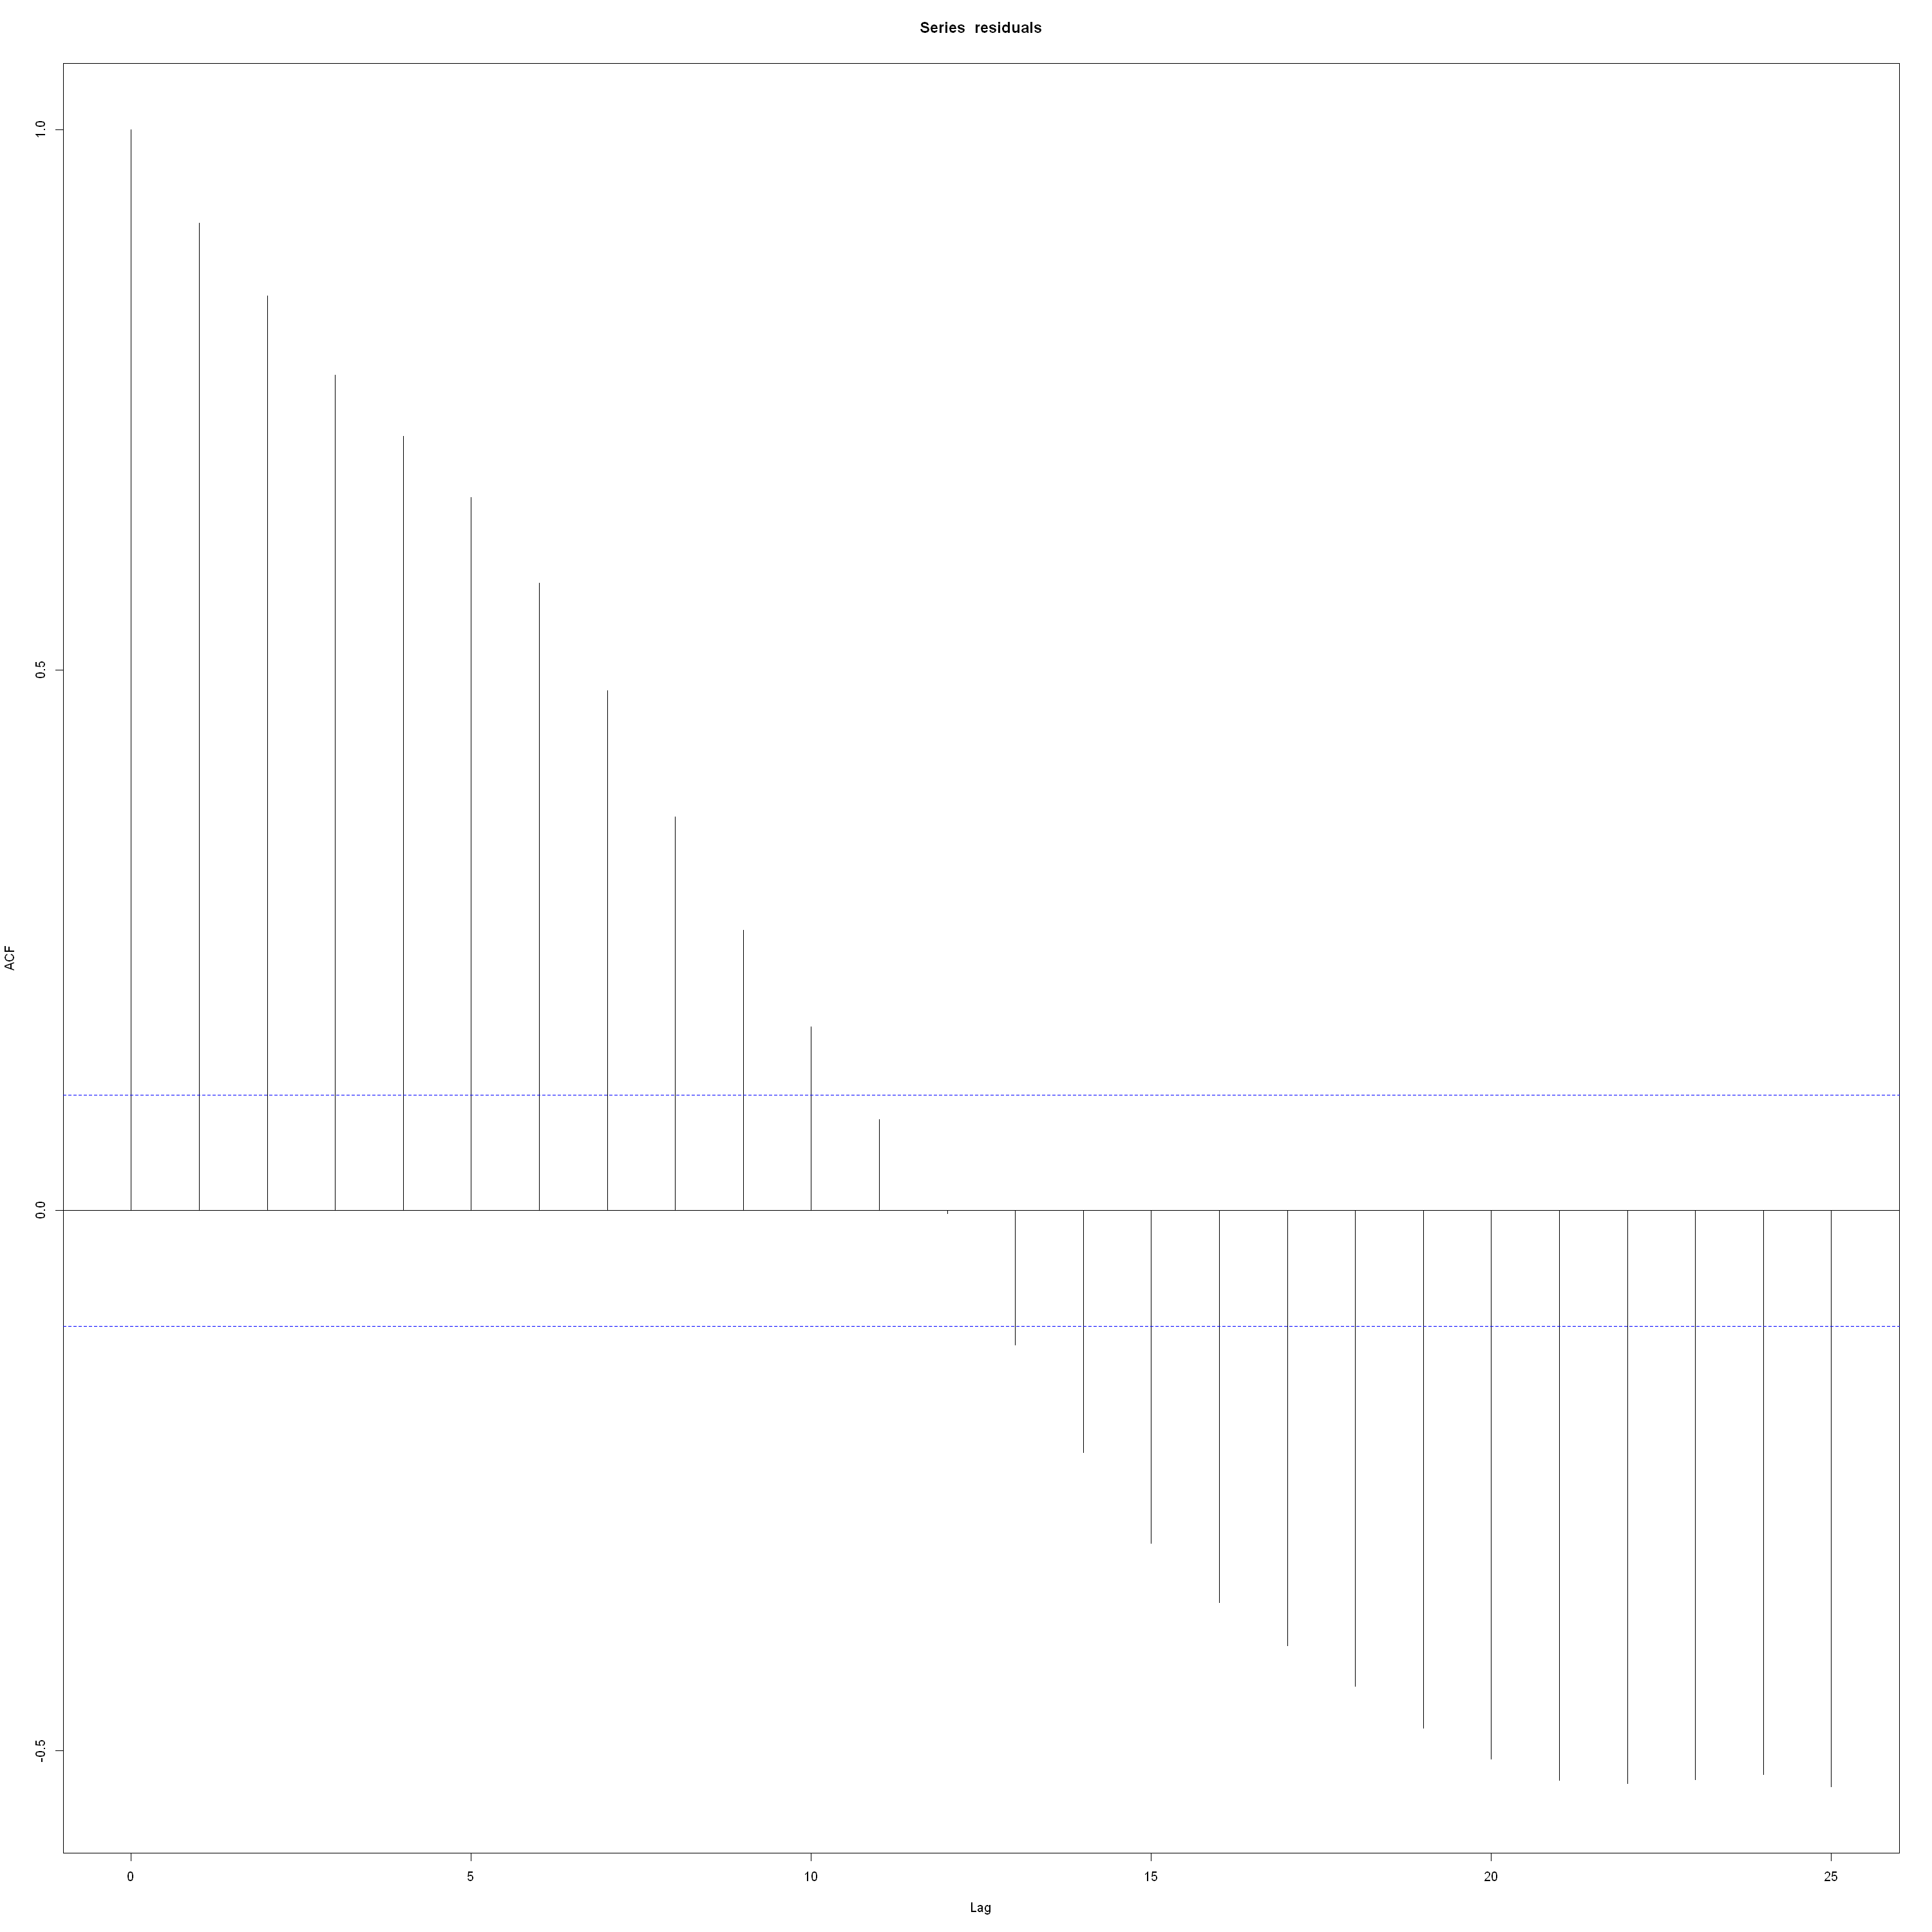

In [97]:
acf(residuals)

### La fonction d'autocorrélation ACF pour les résidus indique la présence d'autocorrélation et donc la 3éme hypothèse pour que une série correspond à un bruit blanc est violée.
### Les résidus issus de l'ajustement de la série ne correspond pas à un bruit blanc. Et donc on peut mieux faire.

## Test de stationnarité

### Les hypothèses pour qu' une série soit stationnaire: <br> <br>La moyenne de la série est constante par rapport au temps<br> <br> La variance de la série est constante par rapport au temps<br> <br> La fonction d'auto corrélation est constante par rapport au temps ( pas de saisonnalité)

### D'après la représentation graphique et la fonction d'autocorrélation pour les résidus on constate que la variance de la série des résidus (dispersion) est à peu prés indépendente du temps, de même absence de saisonnalité. Par contre, la moyenne de la série des résidus varie au cours du temps. et donc la 1ére hypothèse pour que une série soit stationnaire est violée. et donc la série des résidus n'est pas stationnaire.

## Modélisation des résidus par le modèle ARIMA

### Les modèles ARMA et ARIMA sont utilisés pour modéliser des séries temporelles stationnaires. Cependant, le modèle ARIMA pourrait être utilisé dans certains cas lorsque la série n'est pas stationnaire par rapport à la tendance uniquement (la moyenne n'est pas constante par rapport au temps): l'éliminnation de la tendance peut être fait par intégration dans le modèle ARIMA(Integrated). ce qui est bien notre cas.

### Pour déterminer l'ordre p du modèle AR et de l'ordre q du modèle MA, on peut traçer l'acf et le pacf des données résiduelles.

### La fonction d'autocorrélation ACF pour les résidus

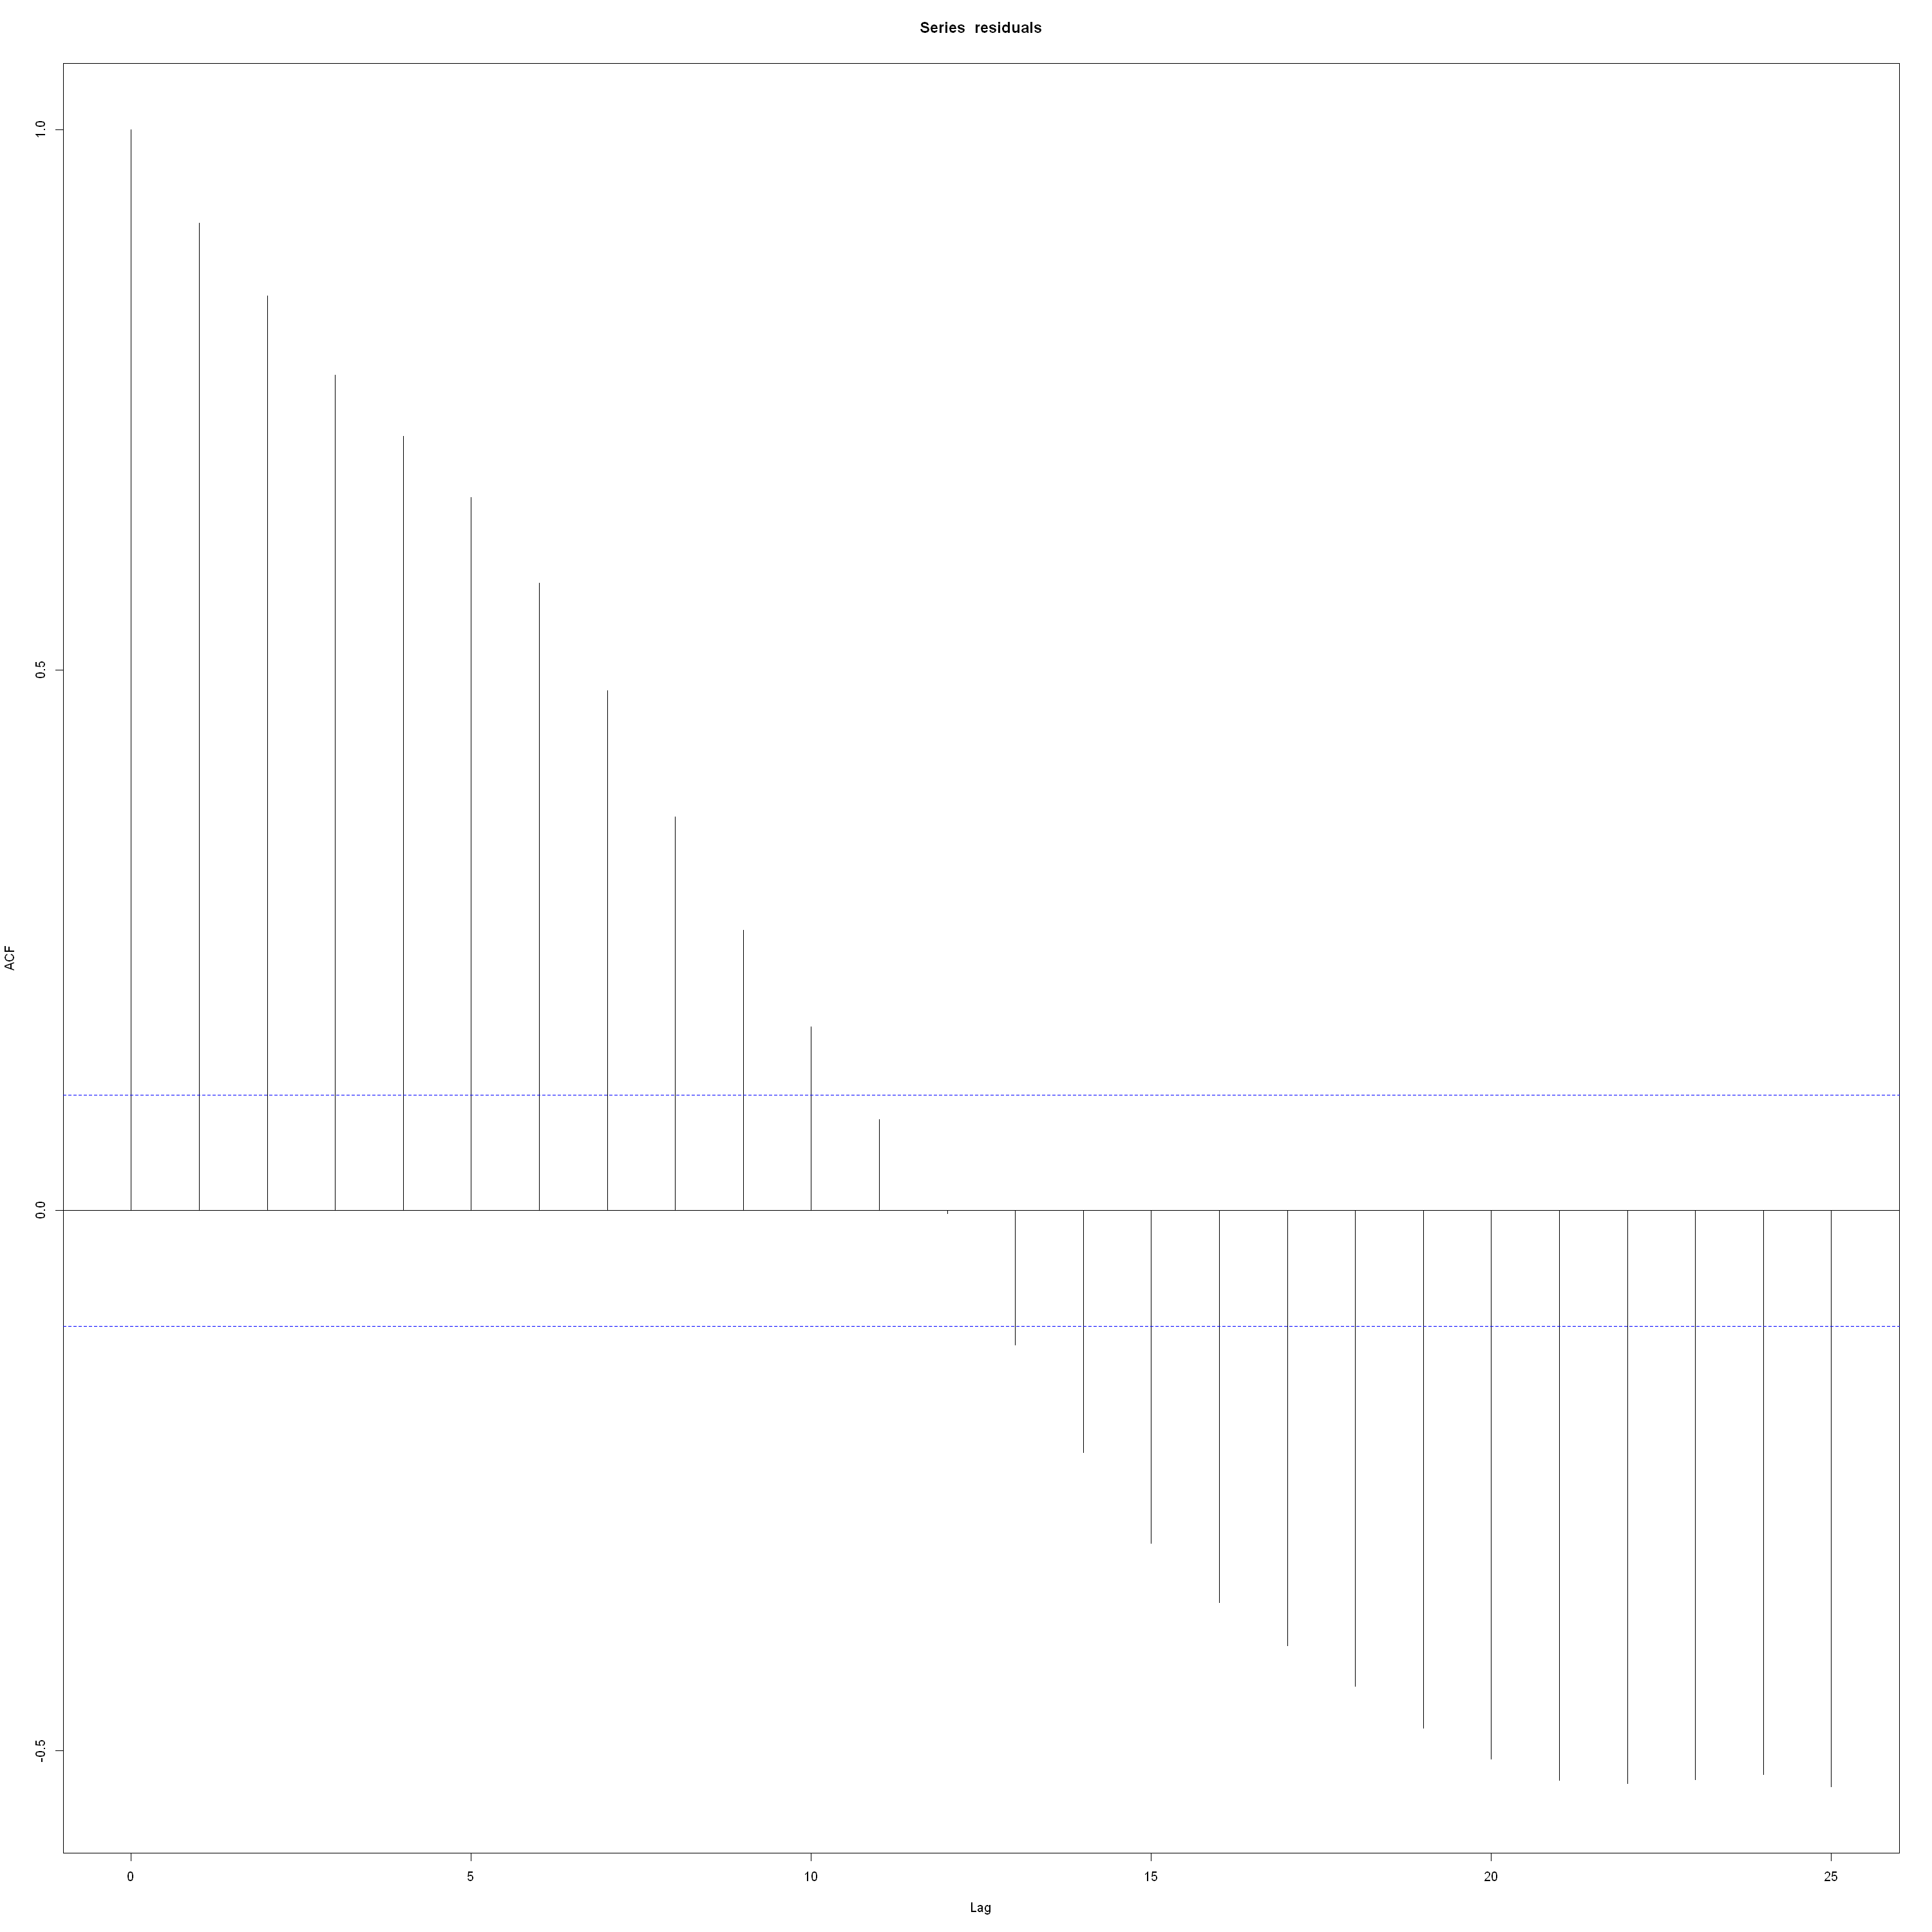

In [98]:
acf(residuals)

### La fonction d'autocorrélation Partielle PACF pour les résidus

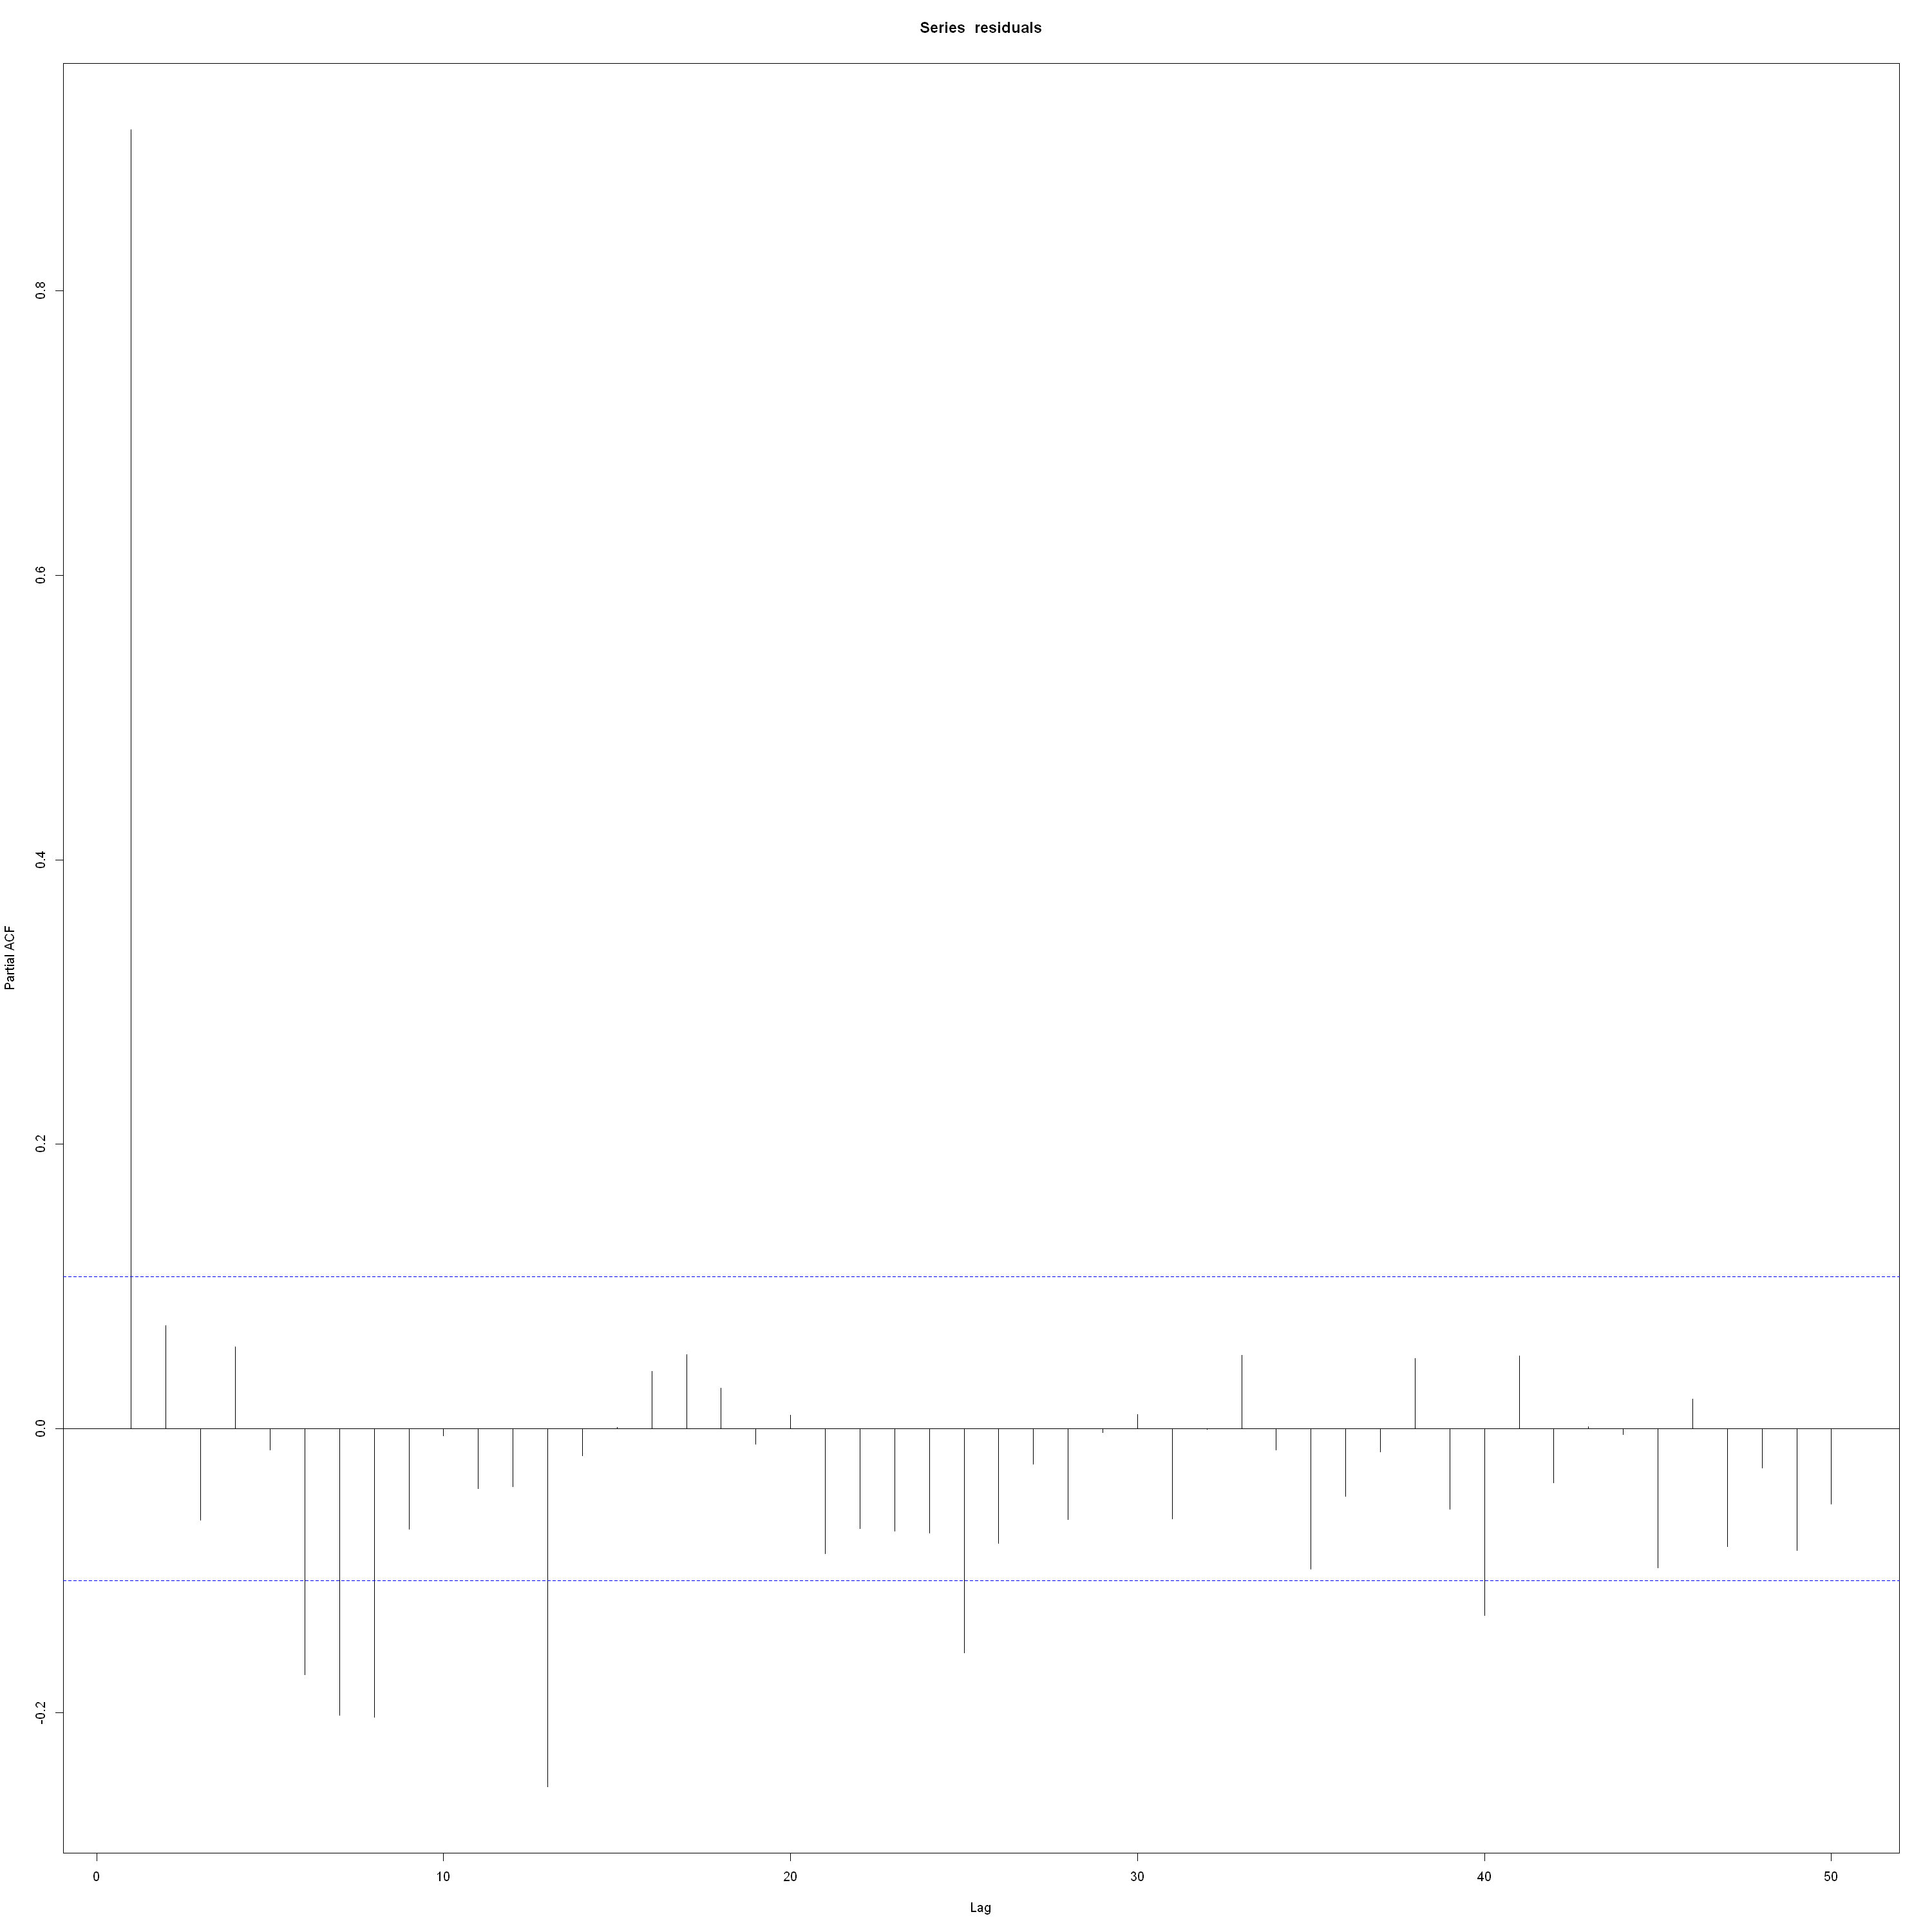

In [99]:
pacf(residuals,50)

### Pour avoir une idée sur l'ordre p du modèle AR, nous pouvons utiliser le PACF car le PACF mesure la corrélation directe (effet direct) d'un décalage (lag) bien déterminé sur l'observation actuelle en supprimant l'effet des périodes de temps intermédiaires. Nous voulons seulement garder les retards qui ont un effet (corrélation) significatif sur l'observation actuelle et nous débarrassons des retards non significatifs.
### De plus, pour l'ordre q du modèle MA, nous pouvons utiliser l'acf et l'ordre q du modèle sera le retard après lequel la corrélation devient non significative.

### Nous pouvons voir qu'il est difficile de déterminer p et q à partir des tracés de l'acf et du pacf dans notre cas. Nous pouvons donc utiliser la fonction auto.arima().<br> La fonction auto.arima teste plusieurs combinaisons et renvoie les modèles testés avec leurs résidus sigma^2 et le modèle avec le sigma^2 le plus bas est sélectionné. Et nous indiquerons d=1 afin que la différenciation soit considérée implicitement.

In [100]:
library(forecast)
ARIMA = auto.arima(residuals, d=1, trace=TRUE)


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : -1240.358
 ARIMA(0,1,0) with drift         : -1235.371
 ARIMA(1,1,0) with drift         : -1239.459
 ARIMA(0,1,1) with drift         : -1235.805
 ARIMA(0,1,0)                    : -1237.37
 ARIMA(1,1,2) with drift         : -1241.539
 ARIMA(0,1,2) with drift         : -1234.52
 ARIMA(1,1,1) with drift         : -1240.424
 ARIMA(1,1,3) with drift         : -1239.211
 ARIMA(0,1,3) with drift         : -1235.975
 ARIMA(2,1,1) with drift         : -1240.254
 ARIMA(2,1,3) with drift         : -1240.37
 ARIMA(1,1,2)                    : -1243.55
 ARIMA(0,1,2)                    : -1236.541
 ARIMA(1,1,1)                    : -1242.459
 ARIMA(2,1,2)                    : -1242.399
 ARIMA(1,1,3)                    : -1241.282
 ARIMA(0,1,1)                    : -1237.813
 ARIMA(0,1,3)                    : -1238.009
 ARIMA(2,1,1)                    : -1242.313
 ARIMA(2,1,3)                    : -1242.45

### Le résultat de la fonction auto.arima() nous donne que le bon modèle à considérer est un ARIMA(1,1,2)

Warning message in adf.test(Model2.res$residuals):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  Model2.res$residuals
Dickey-Fuller = -5.5967, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary



	Ljung-Box test

data:  Residuals from ARIMA(1,1,2)
Q* = 35.228, df = 7, p-value = 1.013e-05

Model df: 3.   Total lags used: 10



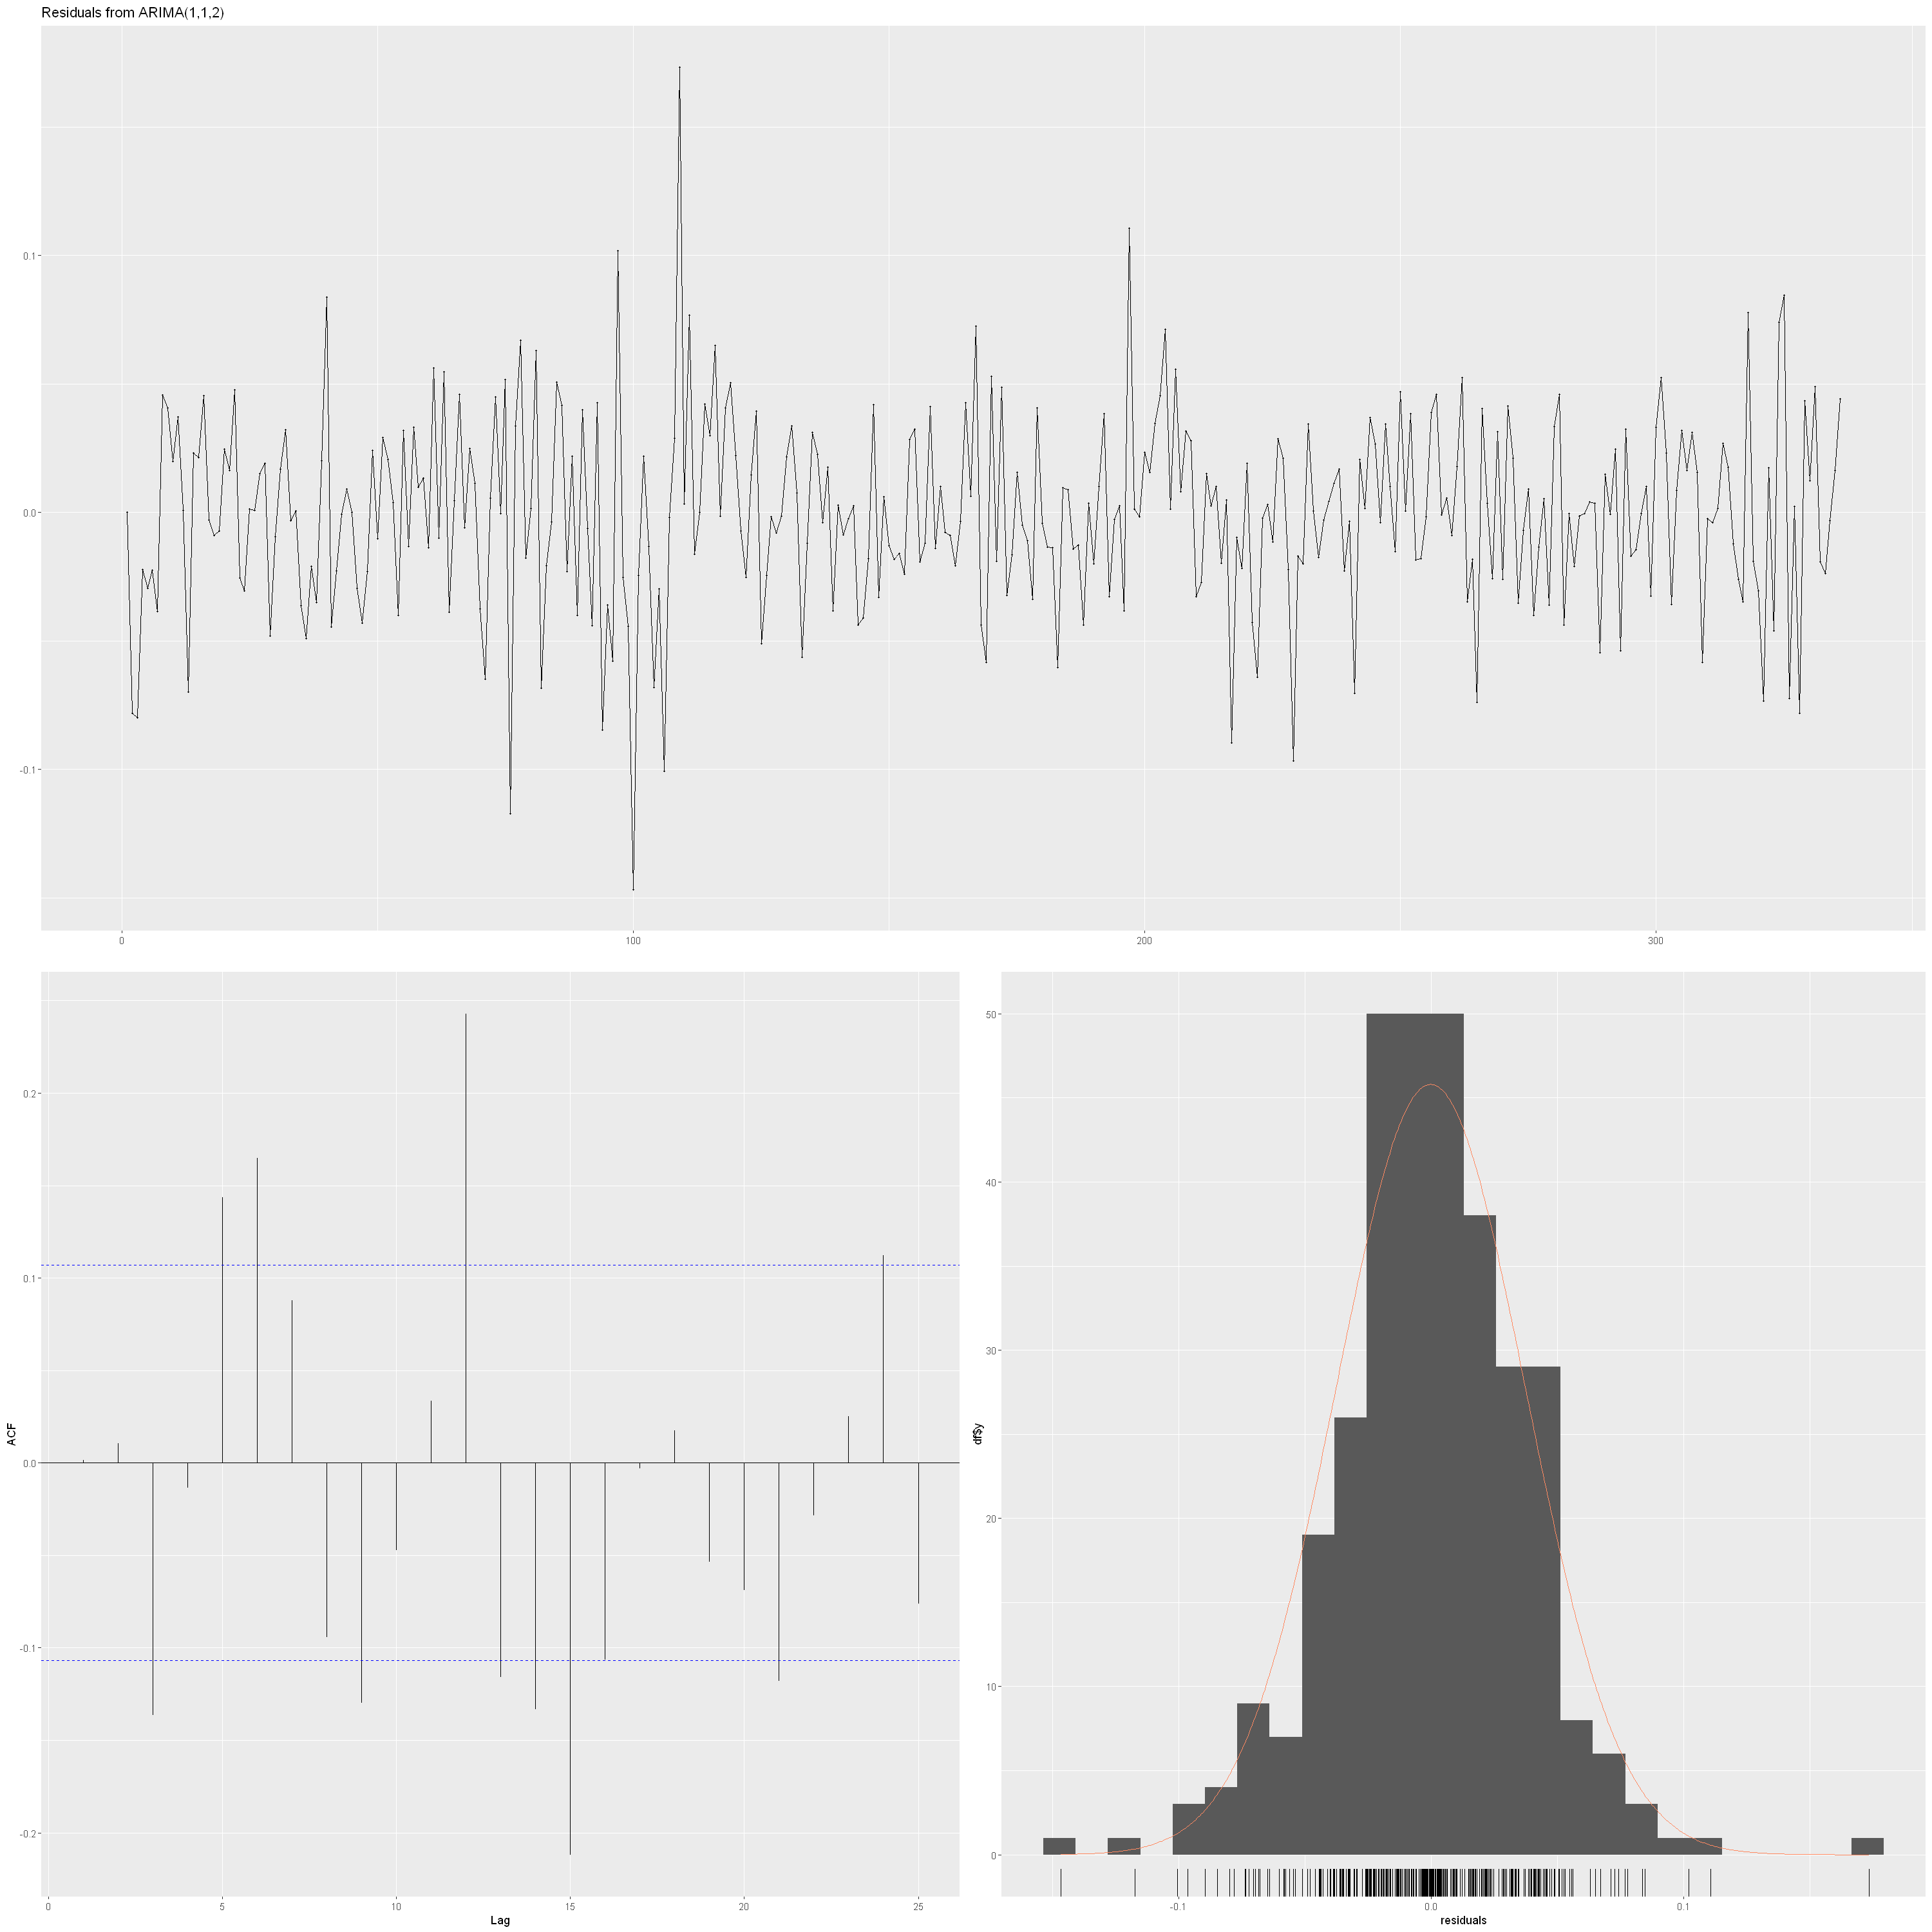

In [101]:
Model2.res = arima(residuals, order = c(1, 1, 2))
adf.test(Model2.res$residuals)
checkresiduals(Model2.res)

### Nous pouvons voir maintenant que les résidus du modèle ARIMA sont stationnaires (p-valeur = 0.01 du test ADF) et correspond à un bruit blanc(p-valeur = 10e-5 du test Ljung-Box)
### Notre modèle est parfait

## Combinaison du modèle déterministe avec le modèle ARIMA

### Recap:
### Le modèle déterministe ajuste la tendance et la composante saisonnière
### Le modèle ARIMA modélise les résidus issus de l'ajustement du deuxième modèle déterministe

In [102]:
Model = auto.arima(dataB2, xreg = cbind(Model2$rs, Model2$fitted.values), seasonal = FALSE)

In [103]:
fitted = fitted(Model, xreg = cbind(Model2$rs, Model2$fitted.values))

In [104]:
fitted = ts(fitted, start = c(1992, 1), end = c(2019, 12), frequency = 12)

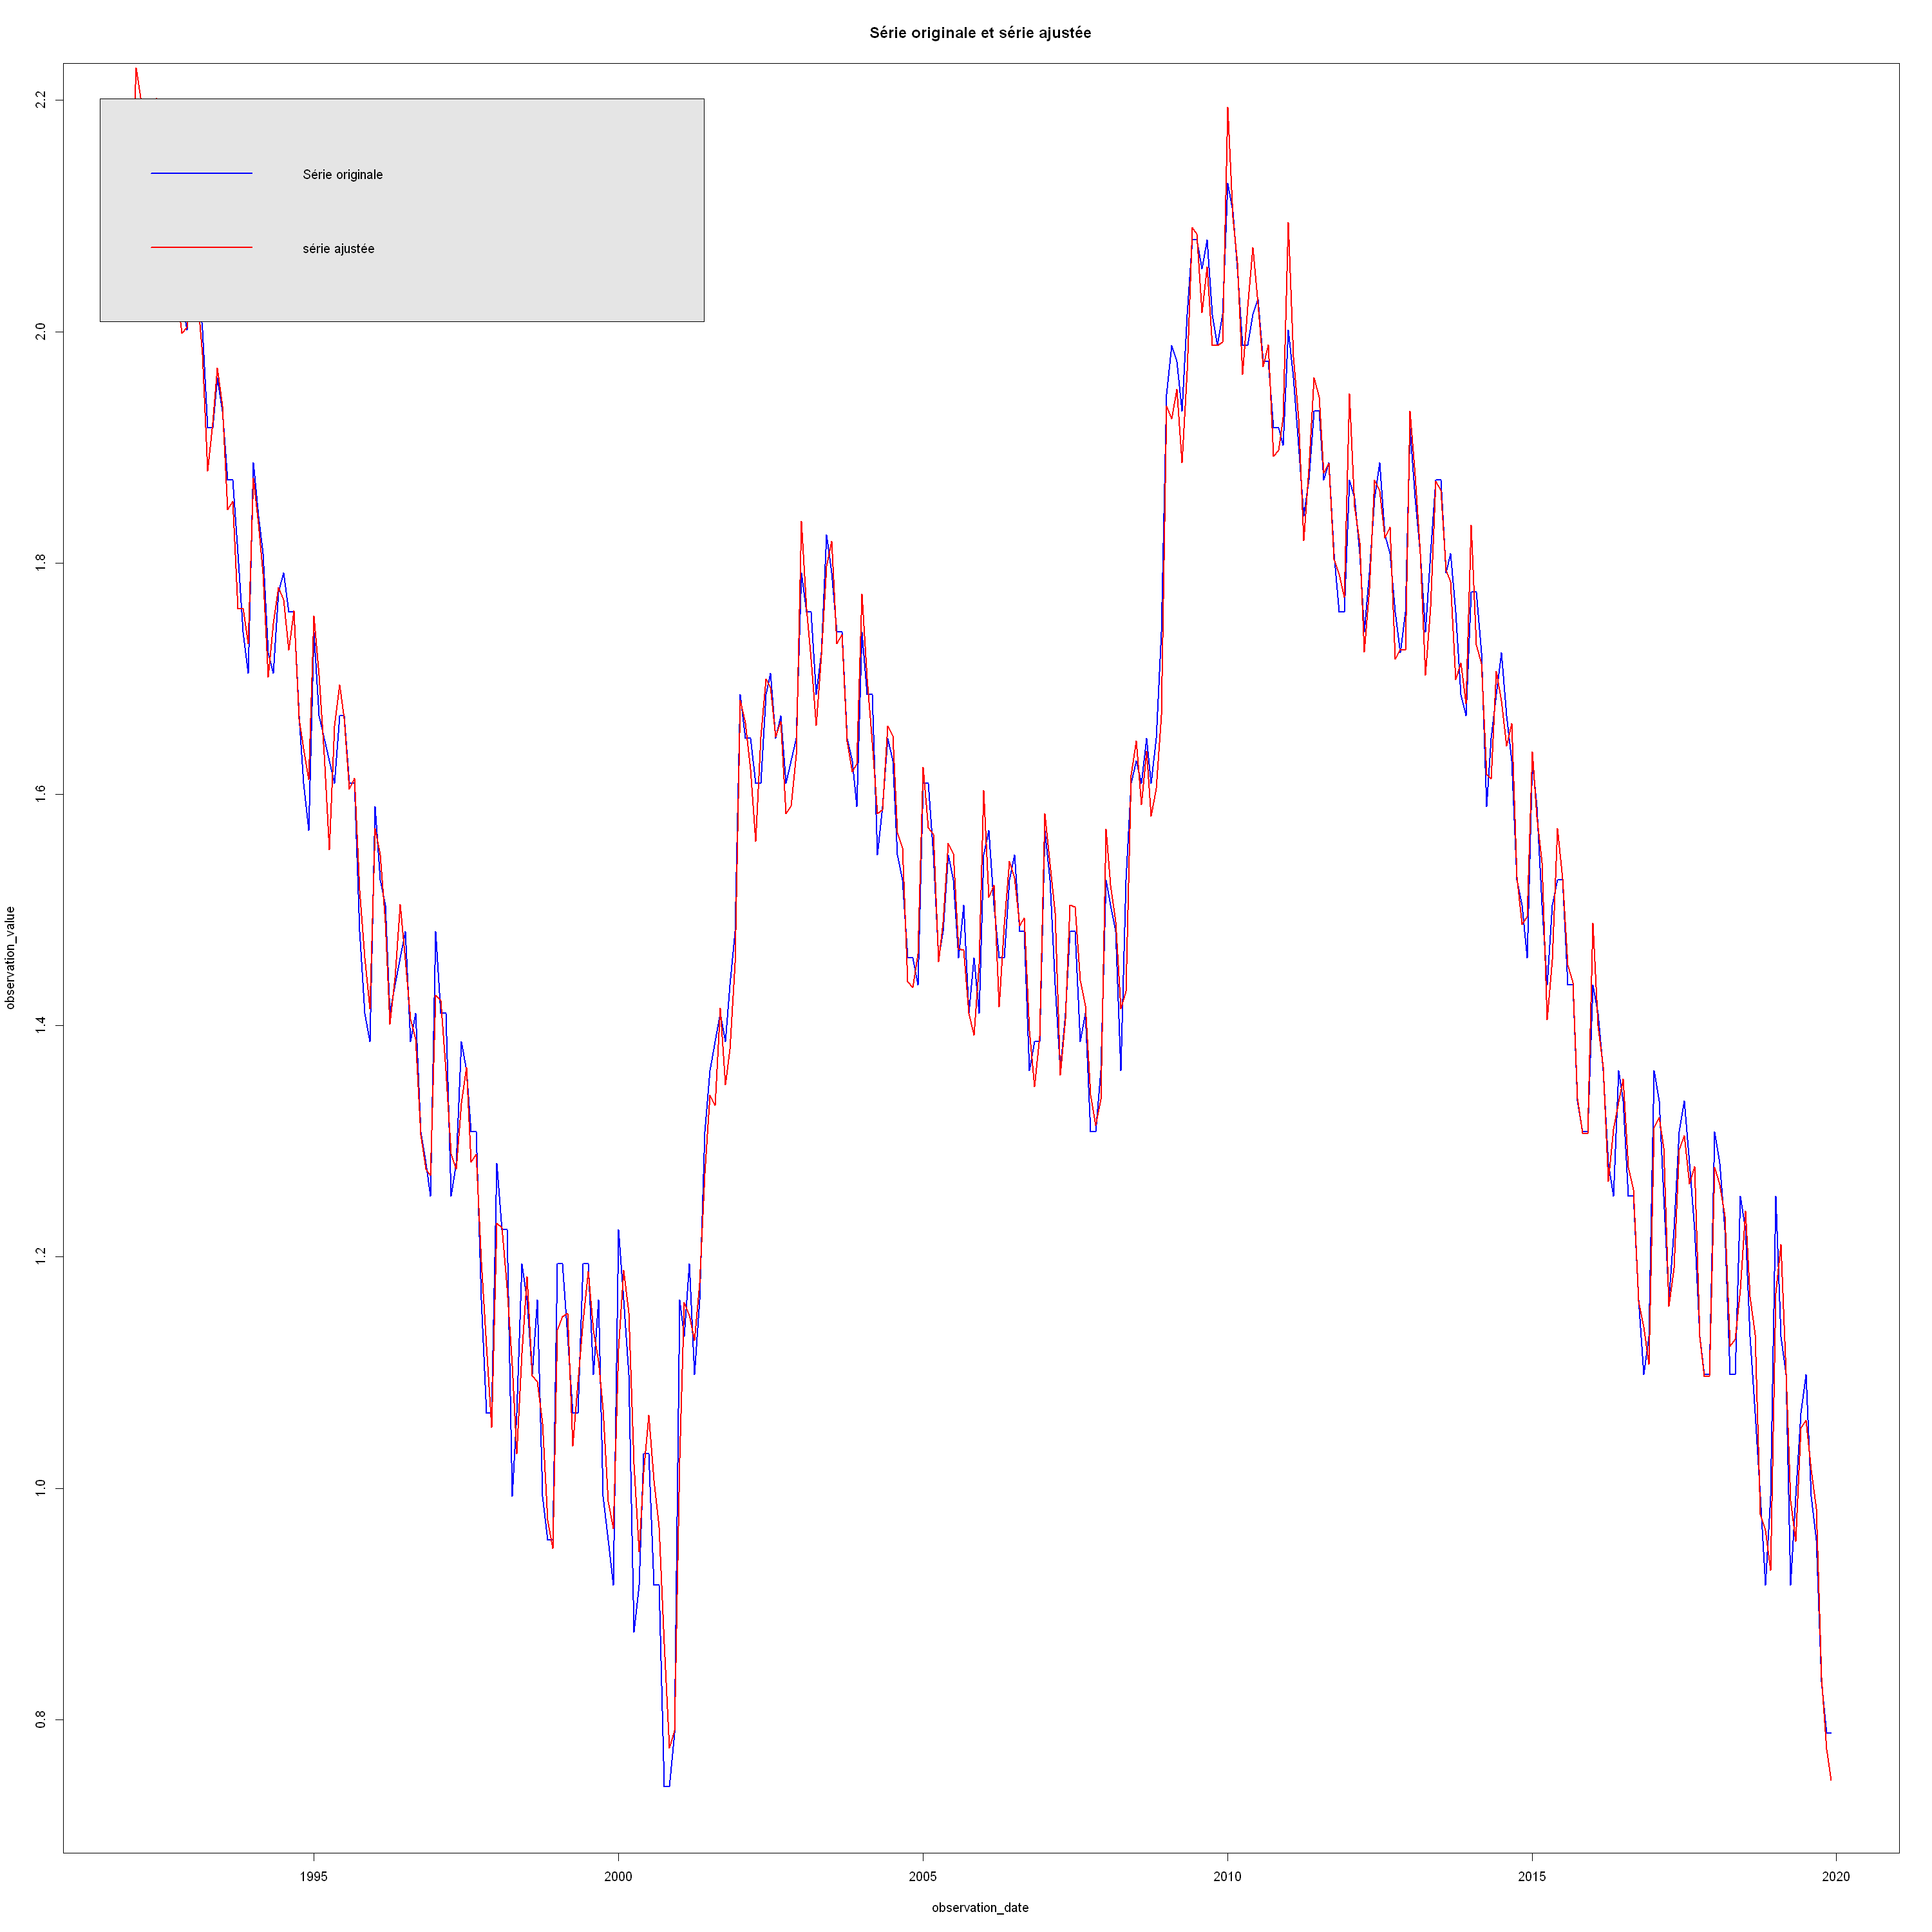

In [105]:
plot(dataB2, xlab="observation_date", ylab="observation_value", main="Série originale et série ajustée", col="blue", lwd=2)
lines(fitted, lwd=2, type="l", col="red")
legend("topleft", c("Série originale","série ajustée"), inset = .02, bg = "gray90", lwd=c(2,2), col=c("blue","red"))